# Human Pose Detection

In [3]:
import cv2
import os
import numpy as np
import pandas as pd
import mediapipe as mp

mpPose = mp.solutions.pose
mpDraw = mp.solutions.drawing_utils
pose = mpPose.Pose(static_image_mode=True, min_detection_confidence=0.5)

valid_extensions = ['.jpg', '.jpeg', '.png']


In [4]:
df = pd.read_csv("Pose_Dataset.csv")

In [5]:
df = df.drop('Unnamed: 0', axis=1)

In [6]:
df

,nose_x,nose_y,nose_z,nose_vis,left_eye_inner_x,left_eye_inner_y,left_eye_inner_z,left_eye_inner_vis,left_eye_x,left_eye_y,...,right_heel_vis,left_foot_index_x,left_foot_index_y,left_foot_index_z,left_foot_index_vis,right_foot_index_x,right_foot_index_y,right_foot_index_z,right_foot_index_vis,label
0,0.070259,0.850580,0.008842,0.999657,0.057877,0.833747,-0.013575,0.999792,0.058772,0.829002,...,0.905966,0.175721,0.800193,-0.493809,0.807481,0.945037,0.129612,0.006328,0.951883,balancing_pose
1,0.912379,0.070192,-0.291406,0.999919,0.883687,0.066609,-0.261887,0.999699,0.880397,0.069498,...,0.990137,0.038183,0.923158,0.670459,0.950165,0.008791,0.945606,-0.004048,0.992827,wheel_pose
2,0.772387,0.506224,-0.447262,0.999392,0.785865,0.505451,-0.417181,0.999566,0.785507,0.507421,...,0.900839,0.024350,0.485662,0.073352,0.968370,0.902215,0.442855,-0.770842,0.970274,balancing_pose
3,0.609201,0.035100,-0.252819,0.999111,0.565762,0.045225,-0.199730,0.999703,0.562713,0.048615,...,0.692353,0.335312,0.789597,1.055729,0.230668,0.095950,0.513359,0.399141,0.561795,wheel_pose
4,0.773037,0.399642,-0.319711,0.999311,0.798232,0.410353,-0.338633,0.998541,0.802056,0.408308,...,0.954056,0.157887,0.806926,0.604863,0.623978,0.035773,0.829340,0.219973,0.978196,wheel_pose
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6214,0.077348,0.265338,-0.156726,0.997582,0.077304,0.229684,-0.209683,0.997688,0.082895,0.226174,...,0.405079,0.561873,0.975417,-0.013894,0.881743,0.555628,0.917409,0.640984,0.481440,standing_pose
6215,0.515801,0.575284,-1.446976,0.999997,0.530704,0.500069,-1.423640,0.999999,0.541045,0.495596,...,0.999906,0.937072,0.310943,-1.642830,0.999270,0.127317,0.431572,-1.592673,0.999873,sitting_pose
6216,0.095387,0.464352,-0.005942,0.999977,0.079976,0.396706,-0.046662,0.999977,0.080868,0.391112,...,0.721747,0.904751,0.935291,-0.198986,0.896790,0.893793,0.891758,0.130681,0.701407,reclining_pose
6217,0.715317,0.145405,-0.425911,0.999878,0.756275,0.115560,-0.412649,0.999913,0.773714,0.116846,...,0.545396,0.094079,0.816718,-0.219145,0.658013,0.537796,0.912550,-0.061609,0.692876,sitting_pose


# Split data into X (features) and y labels

In [7]:
# Split data into X (features) and y (labels)
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [8]:
X

,nose_x,nose_y,nose_z,nose_vis,left_eye_inner_x,left_eye_inner_y,left_eye_inner_z,left_eye_inner_vis,left_eye_x,left_eye_y,...,right_heel_z,right_heel_vis,left_foot_index_x,left_foot_index_y,left_foot_index_z,left_foot_index_vis,right_foot_index_x,right_foot_index_y,right_foot_index_z,right_foot_index_vis
0,0.070259,0.850580,0.008842,0.999657,0.057877,0.833747,-0.013575,0.999792,0.058772,0.829002,...,0.076803,0.905966,0.175721,0.800193,-0.493809,0.807481,0.945037,0.129612,0.006328,0.951883
1,0.912379,0.070192,-0.291406,0.999919,0.883687,0.066609,-0.261887,0.999699,0.880397,0.069498,...,-0.080943,0.990137,0.038183,0.923158,0.670459,0.950165,0.008791,0.945606,-0.004048,0.992827
2,0.772387,0.506224,-0.447262,0.999392,0.785865,0.505451,-0.417181,0.999566,0.785507,0.507421,...,-0.627312,0.900839,0.024350,0.485662,0.073352,0.968370,0.902215,0.442855,-0.770842,0.970274
3,0.609201,0.035100,-0.252819,0.999111,0.565762,0.045225,-0.199730,0.999703,0.562713,0.048615,...,0.161449,0.692353,0.335312,0.789597,1.055729,0.230668,0.095950,0.513359,0.399141,0.561795
4,0.773037,0.399642,-0.319711,0.999311,0.798232,0.410353,-0.338633,0.998541,0.802056,0.408308,...,0.122305,0.954056,0.157887,0.806926,0.604863,0.623978,0.035773,0.829340,0.219973,0.978196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6214,0.077348,0.265338,-0.156726,0.997582,0.077304,0.229684,-0.209683,0.997688,0.082895,0.226174,...,0.779313,0.405079,0.561873,0.975417,-0.013894,0.881743,0.555628,0.917409,0.640984,0.481440
6215,0.515801,0.575284,-1.446976,0.999997,0.530704,0.500069,-1.423640,0.999999,0.541045,0.495596,...,-1.579015,0.999906,0.937072,0.310943,-1.642830,0.999270,0.127317,0.431572,-1.592673,0.999873
6216,0.095387,0.464352,-0.005942,0.999977,0.079976,0.396706,-0.046662,0.999977,0.080868,0.391112,...,0.213090,0.721747,0.904751,0.935291,-0.198986,0.896790,0.893793,0.891758,0.130681,0.701407
6217,0.715317,0.145405,-0.425911,0.999878,0.756275,0.115560,-0.412649,0.999913,0.773714,0.116846,...,-0.019015,0.545396,0.094079,0.816718,-0.219145,0.658013,0.537796,0.912550,-0.061609,0.692876


In [9]:
y

0       balancing_pose
1           wheel_pose
2       balancing_pose
3           wheel_pose
4           wheel_pose
             ...      
6214     standing_pose
6215      sitting_pose
6216    reclining_pose
6217      sitting_pose
6218      sitting_pose
Name: label, Length: 6219, dtype: object

In [10]:
y.value_counts()

standing_pose     1579
sitting_pose      1561
reclining_pose    1394
wheel_pose         688
balancing_pose     611
inverted_pose      386
Name: label, dtype: int64

In [11]:
df

,nose_x,nose_y,nose_z,nose_vis,left_eye_inner_x,left_eye_inner_y,left_eye_inner_z,left_eye_inner_vis,left_eye_x,left_eye_y,...,right_heel_vis,left_foot_index_x,left_foot_index_y,left_foot_index_z,left_foot_index_vis,right_foot_index_x,right_foot_index_y,right_foot_index_z,right_foot_index_vis,label
0,0.070259,0.850580,0.008842,0.999657,0.057877,0.833747,-0.013575,0.999792,0.058772,0.829002,...,0.905966,0.175721,0.800193,-0.493809,0.807481,0.945037,0.129612,0.006328,0.951883,balancing_pose
1,0.912379,0.070192,-0.291406,0.999919,0.883687,0.066609,-0.261887,0.999699,0.880397,0.069498,...,0.990137,0.038183,0.923158,0.670459,0.950165,0.008791,0.945606,-0.004048,0.992827,wheel_pose
2,0.772387,0.506224,-0.447262,0.999392,0.785865,0.505451,-0.417181,0.999566,0.785507,0.507421,...,0.900839,0.024350,0.485662,0.073352,0.968370,0.902215,0.442855,-0.770842,0.970274,balancing_pose
3,0.609201,0.035100,-0.252819,0.999111,0.565762,0.045225,-0.199730,0.999703,0.562713,0.048615,...,0.692353,0.335312,0.789597,1.055729,0.230668,0.095950,0.513359,0.399141,0.561795,wheel_pose
4,0.773037,0.399642,-0.319711,0.999311,0.798232,0.410353,-0.338633,0.998541,0.802056,0.408308,...,0.954056,0.157887,0.806926,0.604863,0.623978,0.035773,0.829340,0.219973,0.978196,wheel_pose
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6214,0.077348,0.265338,-0.156726,0.997582,0.077304,0.229684,-0.209683,0.997688,0.082895,0.226174,...,0.405079,0.561873,0.975417,-0.013894,0.881743,0.555628,0.917409,0.640984,0.481440,standing_pose
6215,0.515801,0.575284,-1.446976,0.999997,0.530704,0.500069,-1.423640,0.999999,0.541045,0.495596,...,0.999906,0.937072,0.310943,-1.642830,0.999270,0.127317,0.431572,-1.592673,0.999873,sitting_pose
6216,0.095387,0.464352,-0.005942,0.999977,0.079976,0.396706,-0.046662,0.999977,0.080868,0.391112,...,0.721747,0.904751,0.935291,-0.198986,0.896790,0.893793,0.891758,0.130681,0.701407,reclining_pose
6217,0.715317,0.145405,-0.425911,0.999878,0.756275,0.115560,-0.412649,0.999913,0.773714,0.116846,...,0.545396,0.094079,0.816718,-0.219145,0.658013,0.537796,0.912550,-0.061609,0.692876,sitting_pose


In [12]:
train = df.copy()

In [13]:
arr = y.unique()
arr

array(['balancing_pose', 'wheel_pose', 'reclining_pose', 'sitting_pose',
       'standing_pose', 'inverted_pose'], dtype=object)

In [14]:
shuffle_o_data = train

In [15]:
shuffle_o_data.shape

(6219, 133)

In [16]:
shuffle_o_data

,nose_x,nose_y,nose_z,nose_vis,left_eye_inner_x,left_eye_inner_y,left_eye_inner_z,left_eye_inner_vis,left_eye_x,left_eye_y,...,right_heel_vis,left_foot_index_x,left_foot_index_y,left_foot_index_z,left_foot_index_vis,right_foot_index_x,right_foot_index_y,right_foot_index_z,right_foot_index_vis,label
0,0.070259,0.850580,0.008842,0.999657,0.057877,0.833747,-0.013575,0.999792,0.058772,0.829002,...,0.905966,0.175721,0.800193,-0.493809,0.807481,0.945037,0.129612,0.006328,0.951883,balancing_pose
1,0.912379,0.070192,-0.291406,0.999919,0.883687,0.066609,-0.261887,0.999699,0.880397,0.069498,...,0.990137,0.038183,0.923158,0.670459,0.950165,0.008791,0.945606,-0.004048,0.992827,wheel_pose
2,0.772387,0.506224,-0.447262,0.999392,0.785865,0.505451,-0.417181,0.999566,0.785507,0.507421,...,0.900839,0.024350,0.485662,0.073352,0.968370,0.902215,0.442855,-0.770842,0.970274,balancing_pose
3,0.609201,0.035100,-0.252819,0.999111,0.565762,0.045225,-0.199730,0.999703,0.562713,0.048615,...,0.692353,0.335312,0.789597,1.055729,0.230668,0.095950,0.513359,0.399141,0.561795,wheel_pose
4,0.773037,0.399642,-0.319711,0.999311,0.798232,0.410353,-0.338633,0.998541,0.802056,0.408308,...,0.954056,0.157887,0.806926,0.604863,0.623978,0.035773,0.829340,0.219973,0.978196,wheel_pose
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6214,0.077348,0.265338,-0.156726,0.997582,0.077304,0.229684,-0.209683,0.997688,0.082895,0.226174,...,0.405079,0.561873,0.975417,-0.013894,0.881743,0.555628,0.917409,0.640984,0.481440,standing_pose
6215,0.515801,0.575284,-1.446976,0.999997,0.530704,0.500069,-1.423640,0.999999,0.541045,0.495596,...,0.999906,0.937072,0.310943,-1.642830,0.999270,0.127317,0.431572,-1.592673,0.999873,sitting_pose
6216,0.095387,0.464352,-0.005942,0.999977,0.079976,0.396706,-0.046662,0.999977,0.080868,0.391112,...,0.721747,0.904751,0.935291,-0.198986,0.896790,0.893793,0.891758,0.130681,0.701407,reclining_pose
6217,0.715317,0.145405,-0.425911,0.999878,0.756275,0.115560,-0.412649,0.999913,0.773714,0.116846,...,0.545396,0.094079,0.816718,-0.219145,0.658013,0.537796,0.912550,-0.061609,0.692876,sitting_pose


# Undersampling Majority classes to 1036

c:\users\226735 c2in\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


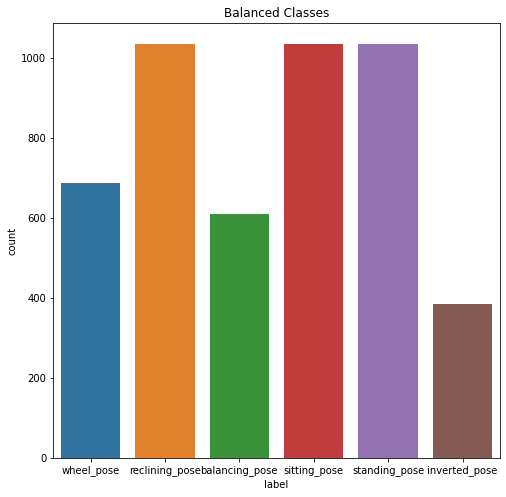

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
wheel_o_data = shuffle_o_data.loc[shuffle_o_data['label'] == 'wheel_pose']
reclining_o_data = shuffle_o_data.loc[shuffle_o_data['label'] == 'reclining_pose'].sample(n=1036,random_state = 2)
balancing_o_data = shuffle_o_data.loc[shuffle_o_data['label'] == 'balancing_pose']
sitting_o_data = shuffle_o_data.loc[shuffle_o_data['label'] == 'sitting_pose'].sample(n=1036,random_state = 2)
standing_o_data = shuffle_o_data.loc[shuffle_o_data['label'] == 'standing_pose'].sample(n=1036,random_state = 2)
inverted_o_data = shuffle_o_data.loc[shuffle_o_data['label'] == 'inverted_pose']
balanced_o_data = pd.concat([wheel_o_data, reclining_o_data, balancing_o_data, sitting_o_data, standing_o_data,inverted_o_data,])
plt.figure(figsize=(8, 8))
sns.countplot('label', data=balanced_o_data)
plt.title('Balanced Classes')
plt.show()

In [18]:
us_majority_data = balanced_o_data

In [19]:
pip install -U "imbalanced-learn < 0.9"

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
X_train_n = us_majority_data.drop(columns = "label")
y_train_n = us_majority_data['label']

In [21]:
X_train_n = us_majority_data.drop(columns = "label")
y_train_n = us_majority_data['label']

In [22]:
X_train_n.head()

,nose_x,nose_y,nose_z,nose_vis,left_eye_inner_x,left_eye_inner_y,left_eye_inner_z,left_eye_inner_vis,left_eye_x,left_eye_y,...,right_heel_z,right_heel_vis,left_foot_index_x,left_foot_index_y,left_foot_index_z,left_foot_index_vis,right_foot_index_x,right_foot_index_y,right_foot_index_z,right_foot_index_vis
1,0.912379,0.070192,-0.291406,0.999919,0.883687,0.066609,-0.261887,0.999699,0.880397,0.069498,...,-0.080943,0.990137,0.038183,0.923158,0.670459,0.950165,0.008791,0.945606,-0.004048,0.992827
3,0.609201,0.035100,-0.252819,0.999111,0.565762,0.045225,-0.199730,0.999703,0.562713,0.048615,...,0.161449,0.692353,0.335312,0.789597,1.055729,0.230668,0.095950,0.513359,0.399141,0.561795
4,0.773037,0.399642,-0.319711,0.999311,0.798232,0.410353,-0.338633,0.998541,0.802056,0.408308,...,0.122305,0.954056,0.157887,0.806926,0.604863,0.623978,0.035773,0.829340,0.219973,0.978196
16,0.147042,0.110211,0.080966,0.999974,0.132291,0.089907,0.100831,0.999974,0.131374,0.090019,...,-0.203248,0.897517,0.937523,0.886455,-0.106377,0.598260,0.965695,0.899308,-0.346230,0.909870
22,0.236527,0.550357,-0.189080,0.996351,0.264407,0.546083,-0.164527,0.995161,0.267341,0.544944,...,-0.079953,0.603158,0.465415,0.674460,0.094545,0.330993,0.609429,0.658095,-0.233454,0.573105


In [23]:
y_train_n.head()

1     wheel_pose
3     wheel_pose
4     wheel_pose
16    wheel_pose
22    wheel_pose
Name: label, dtype: object

# Oversampling Minority class to 1036

c:\users\226735 c2in\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


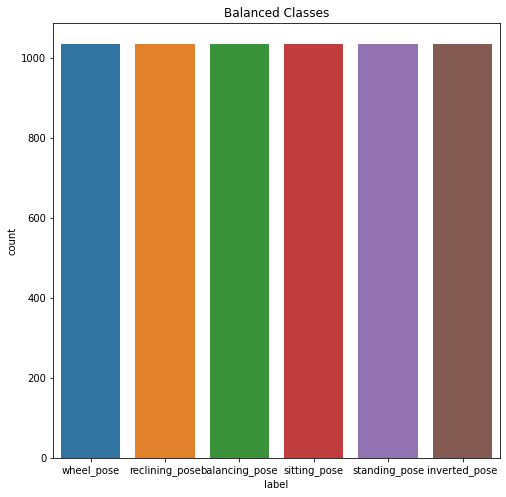

In [24]:
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
sm = SMOTE(sampling_strategy = 'auto', random_state = 5)
X, y = sm.fit_resample(X_train_n, y_train_n)
train_data = pd.concat([X, y], axis = 1)
plt.figure(figsize=(8, 8))
sns.countplot('label', data=train_data)
plt.title('Balanced Classes')
plt.show()

In [25]:
y.value_counts()

standing_pose     1036
sitting_pose      1036
wheel_pose        1036
balancing_pose    1036
reclining_pose    1036
inverted_pose     1036
Name: label, dtype: int64

# Train and Test Split

In [320]:
from sklearn.model_selection import train_test_split

# Splitting the original dataset into train and test sets (80-20 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Splitting the train set into train and validation sets (60-20-20 split)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Checking the size of each split
print("Train set size: ", len(X_train))
print("Validation set size: ", len(X_val))
print("Test set size: ", len(X_test))


Train set size:  3729
Validation set size:  1243
Test set size:  1244


In [319]:
import pandas as pd

# Read CSV file
df = pd.read_csv('Pose_Data_balanced.csv')

# Convert to numpy array
X = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values


# KNN

In [175]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [176]:
X_train.shape

(3729, 132)

In [177]:
X_test.shape

(1244, 132)

In [178]:
X_train

array([[ 0.62500507,  0.30888364, -0.23339951, ...,  0.19222939,
         0.11697435,  0.98625934],
       [ 0.18455727,  0.82018363,  0.03711728, ...,  0.08289289,
        -0.21903871,  0.85777885],
       [ 0.59554726,  0.2069378 , -2.82526064, ...,  0.82137489,
        -0.63931531,  0.74270451],
       ...,
       [ 0.19882897,  0.39673686, -0.00412464, ...,  0.77964151,
         0.10492528,  0.80293298],
       [ 0.91739446,  0.39318866, -0.52723742, ...,  0.12127709,
        -0.3244426 ,  0.99209589],
       [ 0.87341964,  0.68888936, -0.15331771, ...,  0.33920325,
         0.08917677,  0.75296349]])

In [179]:
X_test

array([[ 0.16014045,  0.13956648,  0.31413281, ...,  0.9336136 ,
        -0.82313114,  0.82971722],
       [ 0.35004723,  0.30265582,  0.0033887 , ...,  0.45635512,
         0.55341452,  0.61834407],
       [ 0.13959363,  0.15992934, -0.28207684, ...,  0.85460865,
        -0.08955461,  0.53923976],
       ...,
       [ 0.52612645,  0.79943931, -0.27975631, ...,  0.03054289,
        -0.54504223,  0.83386163],
       [ 0.52873886,  0.1988973 , -2.56133699, ...,  0.70910603,
        -0.89689946,  0.7839433 ],
       [ 0.31264475,  0.68688881, -0.01644525, ...,  0.91147465,
         0.20659657,  0.37717009]])

In [180]:
y_train.shape

(3729,)

In [181]:
y_test.shape

(1244,)

In [198]:
#y_train.value_counts()
unique, counts = np.unique(y_train, return_counts=True)
counts

array([610, 624, 592, 636, 653, 614], dtype=int64)

In [183]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [184]:
knn_acc = accuracy_score(y_test, knn_pred)

In [185]:
knn_acc

0.8786173633440515

In [186]:
from sklearn.svm import SVC
import joblib
from joblib import Parallel, delayed
# Create and train the model
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)


  
# Save the model as a pickle in a file
joblib.dump(knn, 'knn.pkl')
  
# Load the model from the file
knn_from_joblib = joblib.load('knn.pkl')
  
# Use the loaded model to make predictions
knn_from_joblib.predict(X_test)

# # Save the model as an h5 file using joblib
# joblib.dump(clf9, 'svm_model.h5')



array(['balancing_pose', 'balancing_pose', 'sitting_pose', ...,
       'inverted_pose', 'balancing_pose', 'reclining_pose'], dtype=object)

In [187]:
confusion_matrix(y_test,knn_pred)

array([[205,   1,   3,   6,   2,   0],
       [  3, 198,   1,   1,   1,   0],
       [ 14,   5, 175,   6,   4,   6],
       [ 24,   0,   8, 154,  10,   5],
       [ 16,   2,   4,  15, 143,   2],
       [  3,   1,   5,   3,   0, 218]], dtype=int64)

In [188]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

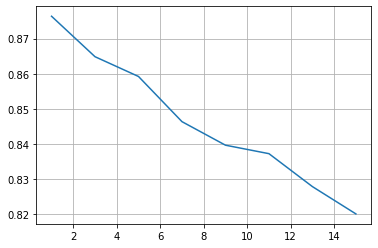

In [189]:
x_axis = []
y_axis = []
for i in range(1, 16, 2):
    clf = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(clf, X_train, y_train)
    x_axis.append(i)
    y_axis.append(score.mean())
    
plt.plot(x_axis,y_axis)
plt.grid()
plt.show()

In [190]:
knn1 = KNeighborsClassifier(n_neighbors = 5)
knn1.fit(X_train, y_train)
knn1_pred = knn1.predict(X_test)
knn1_acc = accuracy_score(y_test, knn1_pred)

In [191]:
knn1_acc

0.8705787781350482

In [192]:
confusion_matrix(y_test,knn1_pred)

array([[212,   1,   0,   3,   1,   0],
       [  5, 193,   1,   4,   1,   0],
       [ 14,   8, 168,   6,   7,   7],
       [ 24,   0,  10, 153,   9,   5],
       [ 17,   4,   4,  15, 139,   3],
       [  2,   1,   4,   4,   1, 218]], dtype=int64)

In [193]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Perform k-fold cross-validation

precision_scores = cross_val_score(knn1, X, y, cv=10, scoring='precision_macro')
recall_scores = cross_val_score(knn1, X, y, cv=10, scoring='recall_macro')
f1_scores = cross_val_score(knn1, X, y, cv=10, scoring='f1_macro')

# Print cross-validation scores
print("Cross-validation precision scores:", precision_scores)
print("Mean precision score:", np.mean(precision_scores))
print("Standard deviation:", np.std(precision_scores))

print("Cross-validation recall scores:", recall_scores)
print("Mean recall score:", np.mean(recall_scores))
print("Standard deviation:", np.std(recall_scores))

print("Cross-validation F1 scores:", f1_scores)
print("Mean F1 score:", np.mean(f1_scores))
print("Standard deviation:", np.std(f1_scores))


Cross-validation precision scores: [0.872683   0.87101916 0.88406814 0.90399476 0.88567719 0.88172253
 0.91006122 0.89989851 0.89778576 0.92109612]
Mean precision score: 0.892800638212802
Standard deviation: 0.01558197081754313
Cross-validation recall scores: [0.86666044 0.86824745 0.88103684 0.90196353 0.88396191 0.87758277
 0.90663119 0.89535101 0.89731143 0.918207  ]
Mean recall score: 0.889695357231765
Standard deviation: 0.016079216372234636
Cross-validation F1 scores: [0.86564763 0.86764829 0.87952821 0.90189576 0.88311342 0.87713212
 0.90558514 0.89382407 0.89558817 0.91659096]
Mean F1 score: 0.8886553776622419
Standard deviation: 0.015920296654368973


In [194]:
scores = cross_val_score(knn1, X, y, cv=10, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", scores)
print("Mean score:", np.mean(scores))
print("Standard deviation:", np.std(scores))

Cross-validation scores: [0.86655949 0.8681672  0.88102894 0.90192926 0.88424437 0.8778135
 0.90660225 0.89533011 0.89694042 0.9178744 ]
Mean score: 0.8896489947237886
Standard deviation: 0.015995368514497916


In [195]:
model_dict = {'model': knn1, 'accuracy': np.mean(scores), 'precision_scores': np.mean(precision_scores), 'recall_scores': np.mean(recall_scores), 'f1_scores': np.mean(f1_scores)}
joblib.dump(model_dict, 'knn5_cv.pkl')


['knn5_cv.pkl']

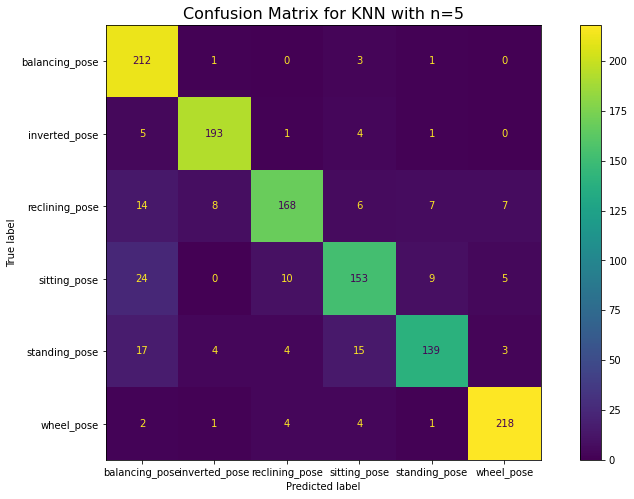

In [203]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

knn1 = KNeighborsClassifier(n_neighbors = 5)
knn1.fit(X_train, y_train)
knn1_pred = knn1.predict(X_test)
knn1_acc = accuracy_score(y_test, knn1_pred)

fig, ax = plt.subplots(figsize=(14, 8))
plot_confusion_matrix(knn1, X_test, y_test, ax=ax)
plt.title('Confusion Matrix for KNN with n=5', fontsize=16)
plt.show()


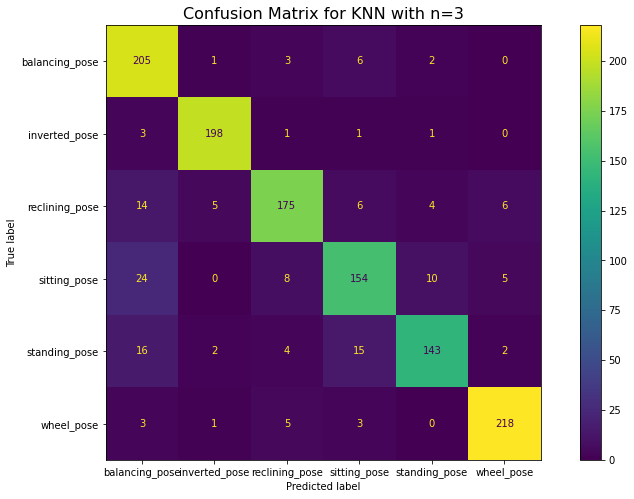

In [205]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)

fig, ax = plt.subplots(figsize=(14, 8))
plot_confusion_matrix(knn, X_test, y_test, ax=ax)
plt.title('Confusion Matrix for KNN with n=3', fontsize=16)
plt.show()


# Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
gnb_acc = accuracy_score(y_test, gnb_pred)

In [46]:
confusion_matrix(y_test,gnb_pred)

array([[ 63,   4,  97,  44,   1,   8],
       [  1, 169,  29,   2,   0,   3],
       [  3,   5, 141,  15,  12,  34],
       [ 12,   0,  40, 122,  17,  10],
       [  8,   8,  46,  14,  97,   9],
       [  7,   1,  97,   9,  15, 101]], dtype=int64)

In [47]:
gnb_acc

0.5570739549839229

# Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)

In [49]:
confusion_matrix(y_test,dt_pred)

array([[163,   3,  18,  20,   6,   7],
       [  2, 189,   5,   3,   2,   3],
       [ 18,   9, 141,  18,   9,  15],
       [ 20,   0,  21, 134,  16,  10],
       [ 11,   1,   6,   4, 148,  12],
       [  5,   1,  20,   7,  15, 182]], dtype=int64)

In [50]:
dt_acc

0.7692926045016077

# RandomForest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf1.fit(X_train, y_train)
rf1_pred = rf1.predict(X_test)
rf1_acc = accuracy_score(y_test, rf1_pred)

In [52]:
confusion_matrix(y_test,rf1_pred)

array([[198,   2,   5,   9,   3,   0],
       [  1, 198,   2,   3,   0,   0],
       [  7,   7, 181,  11,   1,   3],
       [ 15,   1,  10, 167,   6,   2],
       [  6,   0,   6,   2, 168,   0],
       [  4,   1,   9,   2,   5, 209]], dtype=int64)

In [53]:
rf1_acc

0.9011254019292605

In [236]:
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(n_estimators=1000, random_state=42)
rf2.fit(X_train, y_train)
rf2_pred = rf2.predict(X_test)
rf2_acc = accuracy_score(y_test, rf2_pred)

In [237]:
confusion_matrix(y_test,rf2_pred)

array([[193,   4,   6,  11,   2,   1],
       [  2, 197,   3,   2,   0,   0],
       [  7,   6, 179,  12,   3,   3],
       [ 15,   0,  10, 168,   6,   2],
       [  6,   0,   4,   5, 166,   1],
       [  4,   2,   9,   3,   4, 208]], dtype=int64)

In [238]:
rf2_acc

0.8930868167202572

In [57]:
rf2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [239]:
rf5 = RandomForestClassifier(n_estimators=800, random_state=42)
rf5.fit(X_train, y_train)
rf5_pred = rf5.predict(X_test)
rf5_acc = accuracy_score(y_test, rf5_pred)

In [240]:
rf5_acc

0.8954983922829582

In [58]:
rf3 = RandomForestClassifier(n_estimators=1500, random_state=42)
rf3.fit(X_train, y_train)
rf3_pred = rf3.predict(X_test)
rf3_acc = accuracy_score(y_test, rf3_pred)

In [59]:
confusion_matrix(y_test,rf3_pred)

array([[193,   4,   6,  11,   2,   1],
       [  2, 197,   3,   2,   0,   0],
       [  6,   6, 179,  12,   4,   3],
       [ 15,   1,   9, 168,   6,   2],
       [  6,   0,   4,   5, 167,   0],
       [  4,   2,  10,   3,   4, 207]], dtype=int64)

In [60]:
rf3_acc

0.8930868167202572

In [61]:
rf3.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [62]:
rf4 = RandomForestClassifier(n_estimators=2000, random_state=42)
rf4.fit(X_train, y_train)
rf4_pred = rf4.predict(X_test)
rf4_acc = accuracy_score(y_test, rf4_pred)

In [63]:
confusion_matrix(y_test,rf4_pred)

array([[193,   4,   6,  11,   2,   1],
       [  2, 197,   3,   2,   0,   0],
       [  6,   6, 179,  12,   4,   3],
       [ 15,   1,   9, 169,   5,   2],
       [  6,   0,   4,   5, 167,   0],
       [  4,   2,  10,   3,   4, 207]], dtype=int64)

In [64]:
rf4_acc

0.8938906752411575

In [65]:
# Train the model on the training set
rf2.fit(X_train, y_train)

# Evaluate performance on the training set
train_acc = rf2.score(X_train, y_train)

# Evaluate performance on the validation set
val_acc = rf2.score(X_val, y_val)

# Evaluate performance on the test set
test_acc = rf2.score(X_test, y_test)

print("Training accuracy:", train_acc)
print("Validation accuracy:", val_acc)
print("Test accuracy:", test_acc)


Training accuracy: 0.9973183159023867
Validation accuracy: 0.910699919549477
Test accuracy: 0.8930868167202572


In [66]:
# Train the model on the training set
rf3.fit(X_train, y_train)

# Evaluate performance on the training set
train_acc = rf3.score(X_train, y_train)

# Evaluate performance on the validation set
val_acc = rf3.score(X_val, y_val)

# Evaluate performance on the test set
test_acc = rf3.score(X_test, y_test)

print("Training accuracy:", train_acc)
print("Validation accuracy:", val_acc)
print("Test accuracy:", test_acc)


Training accuracy: 0.9973183159023867
Validation accuracy: 0.911504424778761
Test accuracy: 0.8930868167202572


In [67]:
from sklearn.metrics import classification_report

# Fit the model to the training data
rf2.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = rf2.predict(X_train)

# Make predictions on the validation set
y_val_pred = rf2.predict(X_val)

# Make predictions on the test set
y_test_pred = rf2.predict(X_test)

# Print classification report for each set
print('Training Set:\n', classification_report(y_train, y_train_pred))
print('Validation Set:\n', classification_report(y_val, y_val_pred))
print('Test Set:\n', classification_report(y_test, y_test_pred))


Training Set:
                 precision    recall  f1-score   support

balancing_pose       0.99      1.00      0.99       610
 inverted_pose       1.00      1.00      1.00       624
reclining_pose       1.00      1.00      1.00       592
  sitting_pose       1.00      0.98      0.99       636
 standing_pose       1.00      1.00      1.00       653
    wheel_pose       1.00      1.00      1.00       614

      accuracy                           1.00      3729
     macro avg       1.00      1.00      1.00      3729
  weighted avg       1.00      1.00      1.00      3729

Validation Set:
                 precision    recall  f1-score   support

balancing_pose       0.89      0.93      0.91       209
 inverted_pose       0.97      0.95      0.96       208
reclining_pose       0.90      0.89      0.90       234
  sitting_pose       0.84      0.79      0.81       199
 standing_pose       0.91      0.97      0.94       201
    wheel_pose       0.97      0.93      0.95       192

      accur

In [68]:
from sklearn.svm import SVC
import joblib
from joblib import Parallel, delayed
# Create and train the model
rf2 = RandomForestClassifier(n_estimators=1000, random_state=42)
rf2.fit(X_train, y_train)


  
# Save the model as a pickle in a file
joblib.dump(rf2, 'rf.pkl')
  
# Load the model from the file
rf_from_joblib = joblib.load('rf.pkl')
  
# Use the loaded model to make predictions
rf_from_joblib.predict(X_test)

# # Save the model as an h5 file using joblib
# joblib.dump(clf9, 'svm_model.h5')



array(['sitting_pose', 'balancing_pose', 'sitting_pose', ...,
       'inverted_pose', 'balancing_pose', 'reclining_pose'], dtype=object)

In [213]:
import pandas as pd

# Read CSV file
df = pd.read_csv('Pose_Data_balanced.csv')

# Convert to numpy array
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]


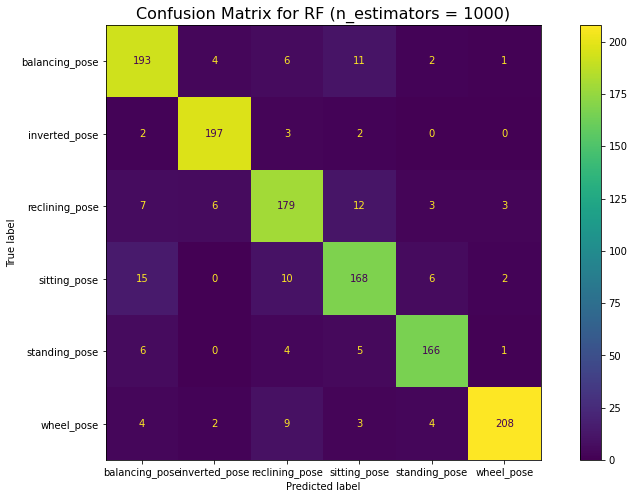

In [244]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(14, 8))
plot_confusion_matrix(rf2, X_test, y_test, ax=ax)
plt.title('Confusion Matrix for RF (n_estimators = 1000)', fontsize=16)
plt.show()



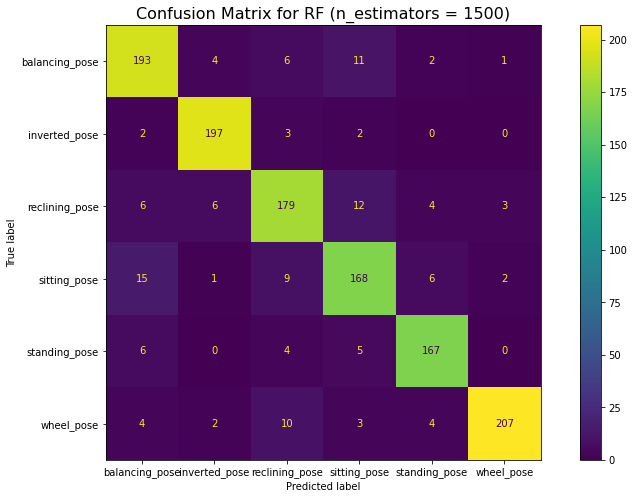

In [246]:
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(14, 8))
plot_confusion_matrix(rf3, X_test, y_test, ax=ax)
plt.title('Confusion Matrix for RF (n_estimators = 1500)', fontsize=16)
plt.show()



# Ridge Classifier

In [69]:
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier()
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_acc = accuracy_score(y_test,ridge_pred)

In [70]:
confusion_matrix(y_test,ridge_pred)

array([[184,   6,   1,  18,   2,   6],
       [  3, 190,   0,   7,   3,   1],
       [ 23,  37,  49,  20,  37,  44],
       [ 24,   2,   9, 131,  21,  14],
       [  3,  10,   1,   8, 153,   7],
       [  4,  23,  22,  16,  11, 154]], dtype=int64)

In [71]:
ridge_acc

0.6921221864951769

# Support Vector Classifier

In [215]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
clf7 = SVC()
grid = {'C':[1,2,3,4,5,25], 
        'kernel':['rbf'],
       'decision_function_shape':['ovo', 'ovr']}
abc = GridSearchCV(clf7, grid)
abc.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5, 25],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'kernel': ['rbf']})

In [216]:
abc.best_estimator_

SVC(C=25, decision_function_shape='ovo')

In [412]:
clf8 = SVC(C=27, decision_function_shape='ovo', kernel='rbf')
clf8.fit(X_train, y_train)
clf8.score(X_test, y_test)

0.909967845659164

In [218]:
clf9 = SVC(C=25, decision_function_shape='ovo', kernel='rbf')
clf9.fit(X_train, y_train)
clf9.score(X_test, y_test)

0.9115755627009646

In [219]:
# Train the model on the training set
clf9.fit(X_train, y_train)

# Evaluate performance on the training set
train_acc = clf9.score(X_train, y_train)

# Evaluate performance on the validation set
val_acc = clf9.score(X_val, y_val)

# Evaluate performance on the test set
test_acc = clf9.score(X_test, y_test)

print("Training accuracy:", train_acc)
print("Validation accuracy:", val_acc)
print("Test accuracy:", test_acc)


Training accuracy: 0.9758648431214803
Validation accuracy: 0.911504424778761
Test accuracy: 0.9115755627009646


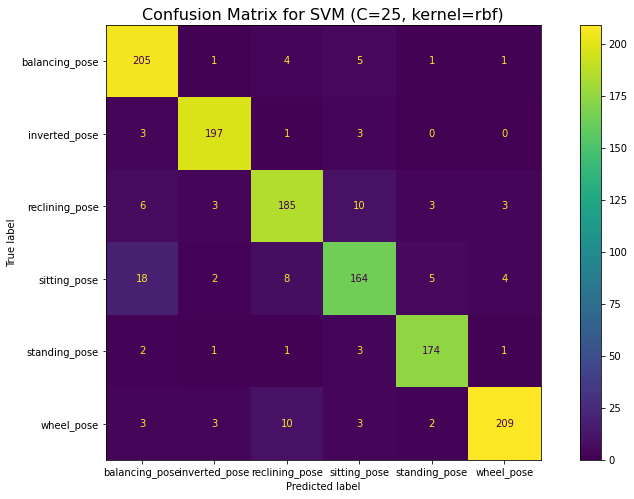

In [224]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(14, 8))
plot_confusion_matrix(clf9, X_test, y_test, ax=ax)
plt.title('Confusion Matrix for SVM (C=25, kernel=rbf)', fontsize=16)
plt.show()



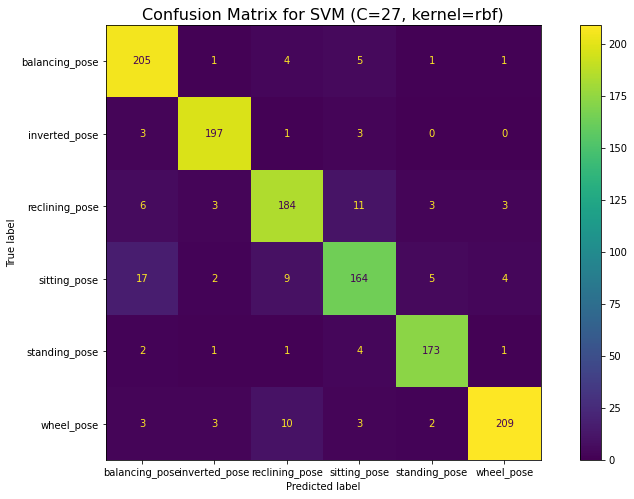

In [225]:
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(14, 8))
plot_confusion_matrix(clf8, X_test, y_test, ax=ax)
plt.title('Confusion Matrix for SVM (C=27, kernel=rbf)', fontsize=16)
plt.show()


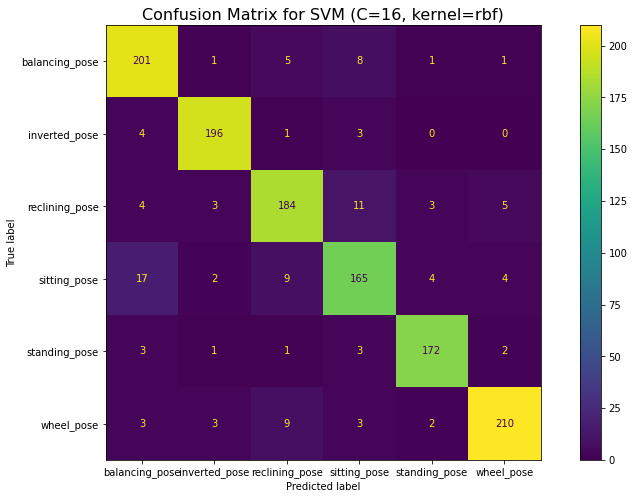

In [227]:
# Train SVM model with C=27, decision_function_shape='ovo', and kernel='rbf'
svm2 = SVC(C=16, decision_function_shape='ovo', kernel='rbf')
svm2.fit(X_train, y_train)

# Make predictions and compute accuracy
svm2_pred = svm2.predict(X_test)
svm2_acc = accuracy_score(y_test, svm2_pred)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(14, 8))
plot_confusion_matrix(svm2, X_test, y_test, ax=ax)
plt.title('Confusion Matrix for SVM (C=16, kernel=rbf)', fontsize=16)
plt.show()


In [228]:
svm2.score(X_test, y_test)

0.9067524115755627

In [77]:
print(os.getcwd())


C:\Users\226735 C2IN\Desktop\Human Pose


In [56]:
import pickle

# Save the SVM model to a file
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(clf9, f)


In [57]:
# Load the SVM model from a file
with open('svm_model.pkl', 'rb') as f:
    clf = pickle.load(f)


In [58]:
with open('svm_model.pkl', 'rb') as f:
    data = f.read()
    print(data)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [78]:
from sklearn.svm import SVC
import joblib
from joblib import Parallel, delayed
# Create and train the model
clf9 = SVC(C=25, decision_function_shape='ovo', kernel='rbf')
clf9.fit(X_train, y_train)


  
# Save the model as a pickle in a file
joblib.dump(clf9, 'svm.pkl')
  
# Load the model from the file
svm_from_joblib = joblib.load('svm.pkl')
  
# Use the loaded model to make predictions
svm_from_joblib.predict(X_test)




array(['balancing_pose', 'balancing_pose', 'sitting_pose', ...,
       'inverted_pose', 'balancing_pose', 'reclining_pose'], dtype=object)

In [79]:
from sklearn.metrics import classification_report

# Fit the model to the training data
clf9.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = clf9.predict(X_train)

# Make predictions on the validation set
y_val_pred = clf9.predict(X_val)

# Make predictions on the test set
y_test_pred = clf9.predict(X_test)

# Print classification report for each set
print('Training Set:\n', classification_report(y_train, y_train_pred))
print('Validation Set:\n', classification_report(y_val, y_val_pred))
print('Test Set:\n', classification_report(y_test, y_test_pred))



Training Set:
                 precision    recall  f1-score   support

balancing_pose       0.95      0.99      0.97       610
 inverted_pose       0.99      1.00      0.99       624
reclining_pose       0.96      0.97      0.97       592
  sitting_pose       0.97      0.93      0.95       636
 standing_pose       0.99      0.98      0.99       653
    wheel_pose       0.99      0.98      0.98       614

      accuracy                           0.98      3729
     macro avg       0.98      0.98      0.98      3729
  weighted avg       0.98      0.98      0.98      3729

Validation Set:
                 precision    recall  f1-score   support

balancing_pose       0.88      0.95      0.91       209
 inverted_pose       0.96      0.96      0.96       208
reclining_pose       0.91      0.89      0.90       234
  sitting_pose       0.86      0.78      0.82       199
 standing_pose       0.93      0.96      0.94       201
    wheel_pose       0.93      0.92      0.92       192

      accur

In [80]:
from sklearn.metrics import classification_report

# Fit the model to the training data
clf8.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = clf8.predict(X_train)

# Make predictions on the validation set
y_val_pred = clf8.predict(X_val)

# Make predictions on the test set
y_test_pred = clf8.predict(X_test)

# Print classification report for each set
print('Training Set:\n', classification_report(y_train, y_train_pred))
print('Validation Set:\n', classification_report(y_val, y_val_pred))
print('Test Set:\n', classification_report(y_test, y_test_pred))



Training Set:
                 precision    recall  f1-score   support

balancing_pose       0.95      0.99      0.97       610
 inverted_pose       0.99      1.00      0.99       624
reclining_pose       0.97      0.97      0.97       592
  sitting_pose       0.97      0.93      0.95       636
 standing_pose       0.99      0.99      0.99       653
    wheel_pose       0.99      0.98      0.98       614

      accuracy                           0.98      3729
     macro avg       0.98      0.98      0.98      3729
  weighted avg       0.98      0.98      0.98      3729

Validation Set:
                 precision    recall  f1-score   support

balancing_pose       0.88      0.95      0.91       209
 inverted_pose       0.96      0.96      0.96       208
reclining_pose       0.91      0.89      0.90       234
  sitting_pose       0.86      0.78      0.82       199
 standing_pose       0.93      0.96      0.94       201
    wheel_pose       0.93      0.92      0.92       192

      accur

In [81]:
# Train the model on the training set
clf8.fit(X_train, y_train)

# Evaluate performance on the training set
train_acc = clf8.score(X_train, y_train)

# Evaluate performance on the validation set
val_acc = clf8.score(X_val, y_val)

# Evaluate performance on the test set
test_acc = clf8.score(X_test, y_test)

print("Training accuracy:", train_acc)
print("Validation accuracy:", val_acc)
print("Test accuracy:", test_acc)


Training accuracy: 0.9769375167605256
Validation accuracy: 0.911504424778761
Test accuracy: 0.909967845659164


In [82]:
clf8.get_params()

{'C': 27,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovo',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

# Multi Layer Perceptron

In [80]:
from sklearn.neural_network import MLPClassifier

In [81]:
h = []
for i in range(0,200):
    h.append(150)
h = tuple(h)
alg_model = MLPClassifier(hidden_layer_sizes=h, 
                              activation='relu', 
                              solver='lbfgs', 
                              batch_size=100)

In [82]:
alg_model.fit(X_train,y_train)
y_pred_mlp=alg_model.predict(X_test)

In [83]:
alg_model.score(X_test, y_test)

0.14630225080385853

# Bagging Classifier

In [83]:
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier()
model.fit(X_train, y_train)
model.predict(X_test)

array(['sitting_pose', 'balancing_pose', 'sitting_pose', ...,
       'inverted_pose', 'balancing_pose', 'reclining_pose'], dtype=object)

In [84]:
model.score(X_test, y_test)

0.8496784565916399

In [85]:
model.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [98]:
rf = RandomForestClassifier(n_estimators=1000)
bagging_rf = BaggingClassifier(base_estimator=rf, n_estimators=10)

bagging_rf.fit(X_train, y_train)
bagging_rf.score(X_test, y_test)


0.8866559485530546

In [101]:
import joblib

# Save the model as a pickle file
joblib.dump(bagging_rf, 'bagging_rf.pkl')

# Load the model from the file
bagging_rf_joblib = joblib.load('bagging_rf.pkl')
  
# Use the loaded model to make predictions
bagging_rf_joblib.predict(X_test)

array(['sitting_pose', 'balancing_pose', 'sitting_pose', ...,
       'inverted_pose', 'balancing_pose', 'reclining_pose'], dtype=object)

In [88]:
clf9 = SVC(C=25, decision_function_shape='ovo', kernel='rbf')
bagging_svc = BaggingClassifier(base_estimator=clf9, n_estimators=10)

bagging_svc.fit(X_train, y_train)
bagging_svc.score(X_test, y_test)


0.907556270096463

In [90]:
clf8 = SVC(C=27, decision_function_shape='ovo', kernel='rbf')
bagging_svc1 = BaggingClassifier(base_estimator=clf8, n_estimators=10)

bagging_svc1.fit(X_train, y_train)
bagging_svc1.score(X_test, y_test)

0.9107717041800643

In [96]:
import joblib

# Save the model as a pickle file
joblib.dump(bagging_svc1, 'bagging_svc1.pkl')


['bagging_svc1.pkl']

In [97]:
# Load the model from the file
bagging_svc1_joblib = joblib.load('bagging_svc1.pkl')
  
# Use the loaded model to make predictions
bagging_svc1_joblib.predict(X_test)

array(['sitting_pose', 'balancing_pose', 'sitting_pose', ...,
       'inverted_pose', 'balancing_pose', 'reclining_pose'], dtype=object)

In [92]:
clf19 = SVC(C=19, decision_function_shape='ovo', kernel='rbf')
bagging_svc3 = BaggingClassifier(base_estimator=clf19, n_estimators=10)

bagging_svc3.fit(X_train, y_train)
bagging_svc3.score(X_test, y_test)

0.905144694533762

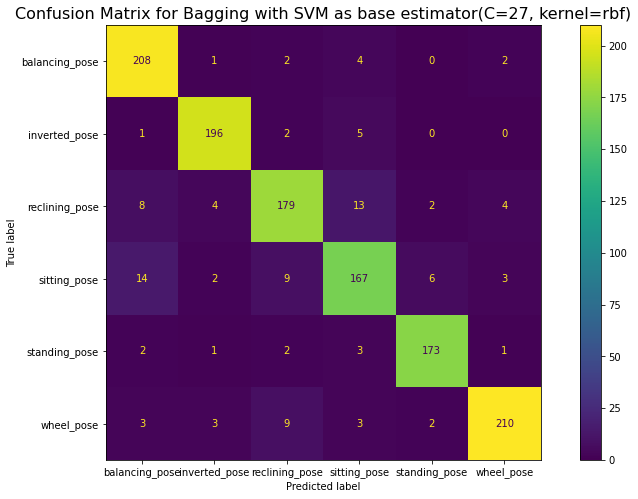

In [250]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(14, 8))
plot_confusion_matrix(bagging_svc1, X_test, y_test, ax=ax)
plt.title('Confusion Matrix for Bagging with SVM as base estimator(C=27, kernel=rbf)', fontsize=16)
plt.show()



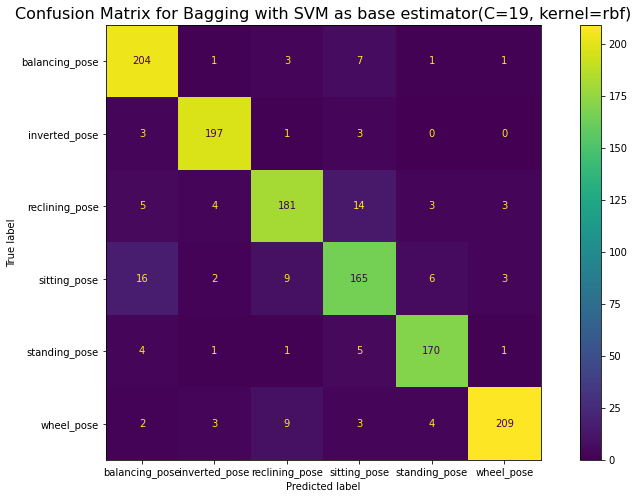

In [251]:
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(14, 8))
plot_confusion_matrix(bagging_svc3, X_test, y_test, ax=ax)
plt.title('Confusion Matrix for Bagging with SVM as base estimator(C=19, kernel=rbf)', fontsize=16)
plt.show()


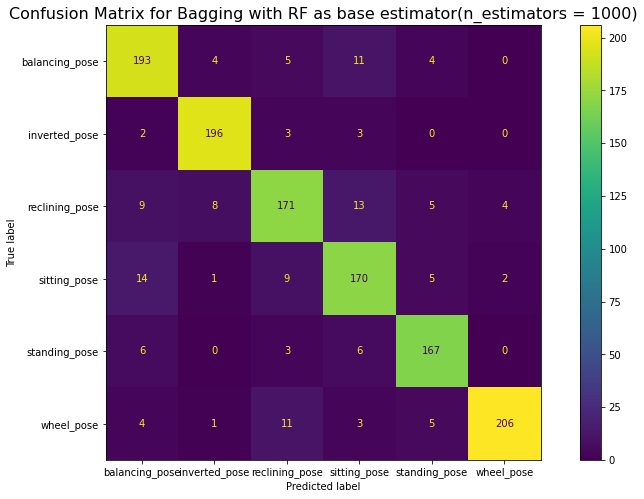

In [252]:
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(14, 8))
plot_confusion_matrix(bagging_rf, X_test, y_test, ax=ax)
plt.title('Confusion Matrix for Bagging with RF as base estimator(n_estimators = 1000)', fontsize=16)
plt.show()



In [ ]:
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(14, 8))
plot_confusion_matrix(bagging_rf_100, X_test, y_test, ax=ax)
plt.title('Confusion Matrix for Bagging with RF as base estimator(n_estimators = 100)', fontsize=16)
plt.show()


In [263]:
clf_bg = SVC(C=17, decision_function_shape='ovo', kernel='rbf')
bagging_svc_bg = BaggingClassifier(base_estimator=clf_bg, n_estimators=10)

bagging_svc_bg.fit(X_train, y_train)
bagging_svc_bg.score(X_test, y_test)


0.907556270096463

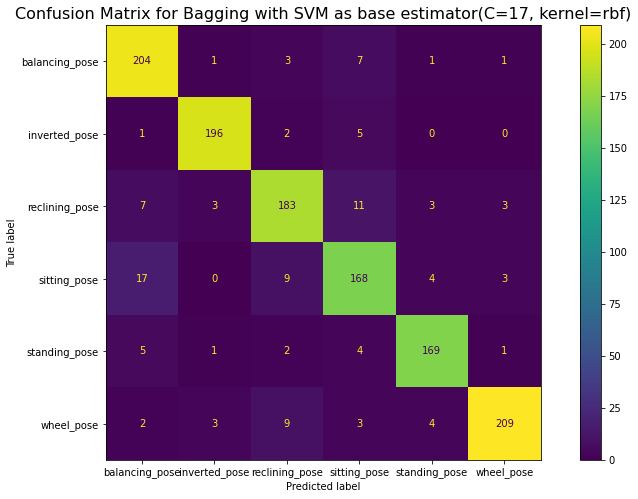

In [264]:
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(14, 8))
plot_confusion_matrix(bagging_svc_bg, X_test, y_test, ax=ax)
plt.title('Confusion Matrix for Bagging with SVM as base estimator(C=17, kernel=rbf)', fontsize=16)
plt.show()

# GradientBoosting Classifier

In [93]:
from sklearn.ensemble import GradientBoostingClassifier

clf11 = GradientBoostingClassifier(random_state = 2)
clf11.fit(X_train, y_train)
clf11.predict(X_test)

array(['sitting_pose', 'balancing_pose', 'sitting_pose', ...,
       'inverted_pose', 'balancing_pose', 'reclining_pose'], dtype=object)

In [94]:
clf11.score(X_test, y_test)

0.8802250803858521

In [95]:
clf11.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 2,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

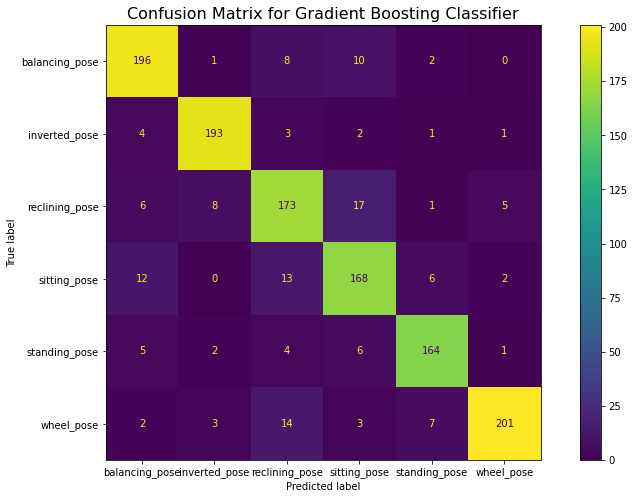

In [265]:
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(14, 8))
plot_confusion_matrix(clf11, X_test, y_test, ax=ax)
plt.title('Confusion Matrix for Gradient Boosting Classifier', fontsize=16)
plt.show()

Enter the path of the image file (jpg, jpeg, png): D:\Birthday 20 sep\0EB9DA5D-4467-4D8B-ABF8-4D7D7ACD6C16.jpeg


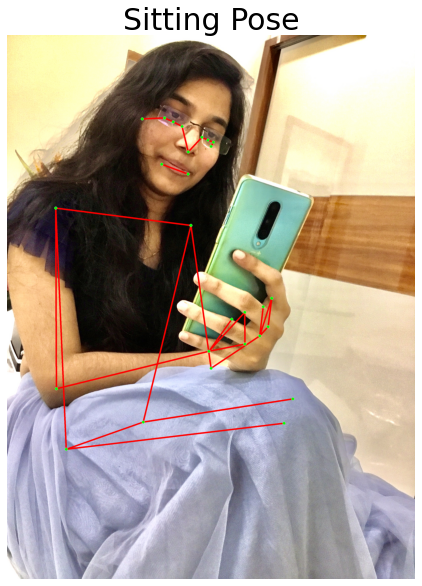

In [130]:
# Initialize Mediapipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
mp_draw = mp.solutions.drawing_utils

X = df.iloc[:, 1:-1]

# Get input image file path from user
path = input("Enter the path of the image file (jpg, jpeg, png): ")

# Read image and convert to RGB format
try:
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
except:
    print("Invalid file format")
    exit()

# Process image and get pose landmarks
results = pose.process(img)
if results.pose_landmarks:
    landmarks = results.pose_landmarks.landmark
    temp = []
    for j in landmarks:
        temp = temp + [j.x, j.y, j.z, j.visibility]
    # Predict pose using SVM model
    pose_label = clf8.predict([temp])[0]
    # Draw pose landmarks on image
    mp_draw.draw_landmarks(img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                           mp_draw.DrawingSpec(color=(0, 255, 0), thickness=8, circle_radius=4),
                           mp_draw.DrawingSpec(color=(255, 0, 0), thickness=8, circle_radius=4))
    # Assign pose name based on predicted label
    pose_names = {'balancing_pose': 'Balancing Pose', 'inverted_pose': 'Inverted Pose',
                  'reclining_pose': 'Reclining Pose', 'sitting_pose': 'Sitting Pose',
                  'standing_pose': 'Standing Pose', 'wheel_pose': 'Wheel Pose'}
    pose_name = pose_names.get(pose_label, "Unknown")
    # Display image with pose label and landmarks
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    plt.title(pose_name,fontsize=30)
    plt.axis('off')
    plt.show()
else:
    print("No pose landmarks detected in the image")


Enter the path of the image file (jpg, jpeg, png): C:\Users\226735 C2IN\Downloads\WhatsApp Image 2023-03-19 at 17.48.46.jpg


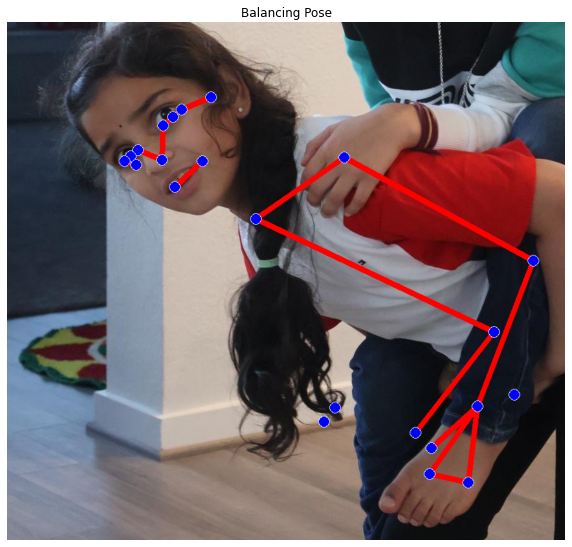

In [154]:
# Initialize Mediapipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
mp_draw = mp.solutions.drawing_utils

X = df.iloc[:, 1:-1]

# Get input image file path from user
path = input("Enter the path of the image file (jpg, jpeg, png): ")

# Read image and convert to RGB format
try:
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
except:
    print("Invalid file format")
    exit()

# Process image and get pose landmarks
results = pose.process(img)
if results.pose_landmarks:
    landmarks = results.pose_landmarks.landmark
    temp = []
    for j in landmarks:
        temp = temp + [j.x, j.y, j.z, j.visibility]
    # Predict pose using SVM model
    pose_label = clf9.predict([temp])[0]
    # Draw pose landmarks on image
    mp_draw.draw_landmarks(img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                           mp_draw.DrawingSpec(color=(0, 0, 255), thickness=8, circle_radius=4),
                           mp_draw.DrawingSpec(color=(255, 0, 0), thickness=8, circle_radius=4))
    # Assign pose name based on predicted label
    pose_names = {'balancing_pose': 'Balancing Pose', 'inverted_pose': 'Inverted Pose',
                  'reclining_pose': 'Reclining Pose', 'sitting_pose': 'Sitting Pose',
                  'standing_pose': 'Standing Pose', 'wheel_pose': 'Wheel Pose'}
    pose_name = pose_names.get(pose_label, "Unknown")
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    plt.title(pose_name)
    plt.axis('off')
    plt.show()
else:
    print("No pose landmarks detected in the image")


Enter the path of the image file (jpg, jpeg, png): C:\Users\226735 C2IN\Downloads\WhatsApp Image 2023-03-19 at 21.06.26.jpg


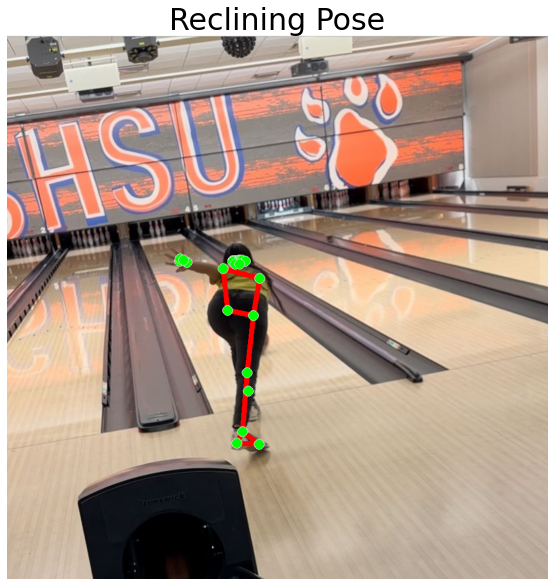

In [164]:
# Initialize Mediapipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
mp_draw = mp.solutions.drawing_utils



# Get input image file path from user
path = input("Enter the path of the image file (jpg, jpeg, png): ")

# Read image and convert to RGB format
try:
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
except:
    print("Invalid file format")
    exit()

# Process image and get pose landmarks
results = pose.process(img)
if results.pose_landmarks:
    landmarks = results.pose_landmarks.landmark
    temp = []
    for j in landmarks:
        temp = temp + [j.x, j.y, j.z, j.visibility]
    # Predict pose using SVM model
    pose_label = clf8.predict([temp])[0]
    # Draw pose landmarks on image
    mp_draw.draw_landmarks(img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                           mp_draw.DrawingSpec(color=(0, 255, 0), thickness=8, circle_radius=4),
                           mp_draw.DrawingSpec(color=(255, 0, 0), thickness=8, circle_radius=4))
    # Assign pose name based on predicted label
    pose_names = {'balancing_pose': 'Balancing Pose', 'inverted_pose': 'Inverted Pose',
                  'reclining_pose': 'Reclining Pose', 'sitting_pose': 'Sitting Pose',
                  'standing_pose': 'Standing Pose', 'wheel_pose': 'Wheel Pose'}
    pose_name = pose_names.get(pose_label, "Unknown")
    # Display image with pose label and landmarks
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    plt.title(pose_name,fontsize=30)
    plt.axis('off')
    plt.show()
else:
    print("No pose landmarks detected in the image")


Enter the path of the image file (jpg, jpeg, png): C:\Users\226735 C2IN\Downloads\WhatsApp Image 2023-03-19 at 23.26.32.jpg


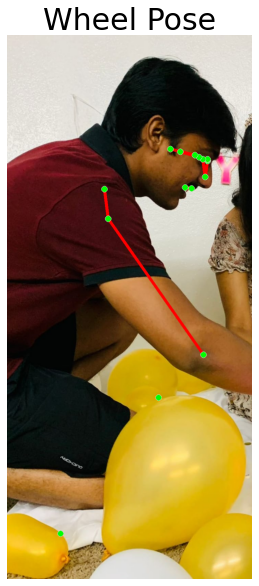

In [172]:
# Initialize Mediapipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
mp_draw = mp.solutions.drawing_utils



# Get input image file path from user
path = input("Enter the path of the image file (jpg, jpeg, png): ")

# Read image and convert to RGB format
try:
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
except:
    print("Invalid file format")
    exit()

# Process image and get pose landmarks
results = pose.process(img)
if results.pose_landmarks:
    landmarks = results.pose_landmarks.landmark
    temp = []
    for j in landmarks:
        temp = temp + [j.x, j.y, j.z, j.visibility]
    # Predict pose using SVM model
    pose_label = clf8.predict([temp])[0]
    # Draw pose landmarks on image
    mp_draw.draw_landmarks(img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                           mp_draw.DrawingSpec(color=(0, 255, 0), thickness=8, circle_radius=4),
                           mp_draw.DrawingSpec(color=(255, 0, 0), thickness=8, circle_radius=4))
    # Assign pose name based on predicted label
    pose_names = {'balancing_pose': 'Balancing Pose', 'inverted_pose': 'Inverted Pose',
                  'reclining_pose': 'Reclining Pose', 'sitting_pose': 'Sitting Pose',
                  'standing_pose': 'Standing Pose', 'wheel_pose': 'Wheel Pose'}
    pose_name = pose_names.get(pose_label, "Unknown")
    # Display image with pose label and landmarks
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    plt.title(pose_name,fontsize=30)
    plt.axis('off')
    plt.show()
else:
    print("No pose landmarks detected in the image")


In [174]:
X.shape

(6219, 133)

In [175]:
y.shape

(6219,)

In [176]:
y

array(['balancing_pose', 'wheel_pose', 'balancing_pose', ...,
       'reclining_pose', 'sitting_pose', 'sitting_pose'], dtype=object)

In [198]:
X_train

,nose_x,nose_y,nose_z,nose_vis,left_eye_inner_x,left_eye_inner_y,left_eye_inner_z,left_eye_inner_vis,left_eye_x,left_eye_y,...,right_heel_z,right_heel_vis,left_foot_index_x,left_foot_index_y,left_foot_index_z,left_foot_index_vis,right_foot_index_x,right_foot_index_y,right_foot_index_z,right_foot_index_vis
894,0.625005,0.308884,-0.233400,0.999936,0.616267,0.253957,-0.208639,0.999836,0.614051,0.251014,...,0.147268,0.991544,0.019372,0.213269,0.390900,0.791197,0.008775,0.192229,0.116974,0.986259
4617,0.184557,0.820184,0.037117,0.999797,0.152850,0.835087,0.084430,0.999904,0.152371,0.837477,...,-0.064627,0.846832,0.606377,0.158363,0.174107,0.362492,0.599003,0.082893,-0.219039,0.857779
2262,0.595547,0.206938,-2.825261,0.999979,0.630537,0.166767,-2.746554,0.999939,0.647857,0.165555,...,-0.102724,0.600709,0.541157,0.824658,-0.579681,0.726340,0.391190,0.821375,-0.639315,0.742705
5061,0.816493,0.346134,-0.332244,0.998341,0.832957,0.295508,-0.305117,0.997356,0.833460,0.289937,...,-0.157527,0.802353,0.855899,0.647462,0.458064,0.234836,0.810192,0.677694,-0.326788,0.831558
3906,0.614805,0.315717,-0.293469,0.999507,0.630101,0.311507,-0.281138,0.998943,0.632982,0.315656,...,0.009306,0.988564,0.787508,0.801854,0.311996,0.903976,0.325743,0.832662,-0.101314,0.989788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,1.000454,0.149044,-0.085760,0.999952,0.985541,0.123843,-0.064837,0.999871,0.983026,0.123961,...,-0.069630,0.972188,0.105176,0.905395,0.339322,0.702868,0.029022,0.925295,-0.055265,0.965858
3166,0.622599,0.696275,-0.233466,0.999945,0.645336,0.683580,-0.232162,0.999960,0.647852,0.676431,...,-0.068234,0.717746,0.736321,0.611992,0.097718,0.321336,0.114860,0.820842,0.053137,0.830344
1518,0.198829,0.396737,-0.004125,0.999703,0.179226,0.387072,-0.043855,0.999686,0.177875,0.381077,...,0.221134,0.778436,0.888358,0.805348,-0.243712,0.964353,0.868348,0.779642,0.104925,0.802933
4064,0.917394,0.393189,-0.527237,1.000000,0.931435,0.413424,-0.527612,0.999997,0.930581,0.421152,...,-0.109737,0.986711,0.600340,1.030767,0.031846,0.987673,0.028832,0.121277,-0.324443,0.992096


In [199]:
X_val

,nose_x,nose_y,nose_z,nose_vis,left_eye_inner_x,left_eye_inner_y,left_eye_inner_z,left_eye_inner_vis,left_eye_x,left_eye_y,...,right_heel_z,right_heel_vis,left_foot_index_x,left_foot_index_y,left_foot_index_z,left_foot_index_vis,right_foot_index_x,right_foot_index_y,right_foot_index_z,right_foot_index_vis
2331,0.109451,0.274940,-0.178788,0.999406,0.093767,0.234532,-0.247900,0.999523,0.097005,0.227544,...,0.991264,0.159401,0.816810,0.798570,0.658038,0.399192,0.745396,0.770367,1.102694,0.126789
723,0.276873,0.842755,0.009436,0.999824,0.274817,0.798808,-0.018290,0.999813,0.277114,0.794916,...,0.276444,0.583909,0.941117,0.891149,-0.172072,0.962912,0.920776,0.806167,0.268823,0.562800
4344,0.276676,0.196175,-0.146967,0.997867,0.267499,0.174299,-0.179067,0.998760,0.268646,0.169987,...,0.320663,0.970164,0.991477,0.186697,-0.157844,0.996586,0.526371,0.930230,0.238675,0.973000
2028,0.557663,0.166105,-1.078596,0.999987,0.587826,0.138295,-1.006626,0.999992,0.605973,0.140194,...,-0.500700,0.381303,0.207113,0.779316,-0.173711,0.338869,0.850947,0.857408,-0.605887,0.435322
1646,0.037973,0.358289,-0.048911,0.998819,0.026918,0.332970,-0.080728,0.999543,0.030556,0.323782,...,0.586038,0.250894,0.536515,0.386147,0.342881,0.890321,0.545842,0.367039,0.735272,0.074407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3012,0.266029,0.174115,-0.115167,0.999965,0.306100,0.145132,-0.232745,0.999987,0.323221,0.144961,...,0.927070,0.743816,0.114286,0.953679,-1.080041,0.985263,0.276919,0.844414,0.940903,0.794448
4454,0.754212,0.824470,0.212248,0.998286,0.792545,0.841328,0.142601,0.998298,0.794935,0.846295,...,0.272986,0.378134,0.458302,0.019077,-0.760826,0.937693,0.453584,0.032386,0.054624,0.426009
6204,0.061987,0.714880,0.064711,0.994487,0.073547,0.748163,0.081930,0.996083,0.076119,0.747438,...,-0.240266,0.864987,0.868521,0.852640,-0.154027,0.389797,0.886014,0.854802,-0.408786,0.635337
1766,0.726507,0.368719,-0.849252,0.999759,0.745219,0.330743,-0.863675,0.999774,0.743171,0.317106,...,0.197166,0.138074,0.183155,0.223762,-0.323277,0.904188,0.237111,0.364219,0.109544,0.486253


In [102]:
def compute_ens_result(rf_result, svm_result, knn_result):
    final_results = []
    for i in range(0, len(rf_result)):
        rf_p = rf_result[i]
        knn_p = knn_result[i]
        svm_p = svm_result[i]
        if rf_p == svm_p and rf_p == knn_p :
            final_results.append(rf_p) 
        elif rf_p == svm_p or rf_p == knn_p :
            final_results.append(rf_p)
        elif knn_p == svm_p :
            final_results.append(svm_p)
        else :
            final_results.append(svm_p)
    
    return final_results

In [269]:
y_pred_svm = clf9.predict(X_test)

In [270]:
y_pred_rf1 = rf1.predict(X_test)

In [271]:
y_pred_rf2 = rf2.predict(X_test)

In [272]:
y_pred_knn = knn.predict(X_test)

In [109]:
y_pred_gboost = clf11.predict(X_test)

In [110]:
y_pred_bagging = model.predict(X_test)

In [111]:
y_pred_bagging_rf = bagging_rf.predict(X_test)

In [114]:
y_pred_bagging_svc1 = bagging_svc1.predict(X_test)

In [273]:
ens = compute_ens_result(y_pred_rf1,y_pred_svm,y_pred_knn)

In [274]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ens))

                precision    recall  f1-score   support

balancing_pose       0.86      0.94      0.90       217
 inverted_pose       0.96      0.98      0.97       204
reclining_pose       0.90      0.89      0.89       210
  sitting_pose       0.90      0.83      0.86       201
 standing_pose       0.94      0.96      0.95       182
    wheel_pose       0.96      0.91      0.94       230

      accuracy                           0.92      1244
     macro avg       0.92      0.92      0.92      1244
  weighted avg       0.92      0.92      0.92      1244



In [275]:
ens_2 = compute_ens_result(y_pred_rf2,y_pred_svm,y_pred_knn)

In [276]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ens_2))

                precision    recall  f1-score   support

balancing_pose       0.86      0.94      0.90       217
 inverted_pose       0.96      0.98      0.97       204
reclining_pose       0.89      0.88      0.89       210
  sitting_pose       0.88      0.83      0.86       201
 standing_pose       0.95      0.96      0.95       182
    wheel_pose       0.96      0.92      0.94       230

      accuracy                           0.92      1244
     macro avg       0.92      0.92      0.92      1244
  weighted avg       0.92      0.92      0.92      1244



In [119]:
def compute_ens_result2(rf_result, svm_result, knn_result, bagging_rf_result, bagging_svc_result):
    final_results = []
    for i in range(0, len(rf_result)):
        rf_p = rf_result[i]
        knn_p = knn_result[i]
        svm_p = svm_result[i]
        bagging_rf_p = bagging_rf_result[i]
        bagging_svc_p = bagging_svc_result[i]
        
        # Count the number of votes for each class
        votes = {}
        for p in [rf_p, knn_p, svm_p, bagging_rf_p, bagging_svc_p]:
            if p in votes:
                votes[p] += 1
            else:
                votes[p] = 1
        
        # Find the class with the most votes
        max_votes = 0
        max_class = None
        for p in votes:
            if votes[p] > max_votes:
                max_votes = votes[p]
                max_class = p
        
        final_results.append(max_class)
    
    return final_results


In [123]:
y_pred_ensemble = compute_ens_result2(y_pred_rf2, y_pred_svm, y_pred_knn, y_pred_bagging_rf, y_pred_bagging_svc1)

In [124]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_ensemble))

                precision    recall  f1-score   support

balancing_pose       0.86      0.94      0.89       217
 inverted_pose       0.97      0.97      0.97       204
reclining_pose       0.88      0.86      0.87       210
  sitting_pose       0.87      0.84      0.85       201
 standing_pose       0.95      0.96      0.95       182
    wheel_pose       0.97      0.92      0.94       230

      accuracy                           0.91      1244
     macro avg       0.91      0.91      0.91      1244
  weighted avg       0.91      0.91      0.91      1244



In [125]:
import joblib

# Save the ensemble predictions as a pickle file
joblib.dump(y_pred_ensemble, 'ensemble_5_models.pkl')

# Load the ensemble predictions from the pickle file
y_pred_ensemble = joblib.load('ensemble_5_models.pkl')


In [83]:
from sklearn.ensemble import VotingClassifier
import joblib

# Load the ensemble model from the pickle file
ens_2 = joblib.load('ensemble_model.pkl')


In [89]:
import joblib
from sklearn.ensemble import VotingClassifier

# Load the trained models from the pickle files
#rf_model = joblib.load('random_forest.pkl')
#svm_model = joblib.load('svm.pkl')

# Create a list of models
models = [('rf', rf_from_joblib), ('svm', svm_from_joblib), ('knn', knn_from_joblib)]

# Create an ensemble model using the voting classifier
ens_2 = VotingClassifier(models, voting='hard')

# Fit the ensemble model
ens_2.fit(X_train, y_train)

# Make predictions on new data
y_pred = ens_2.predict(X_test)


In [92]:
import joblib

# Save the ensemble model as a pickle file
joblib.dump(ens_2, 'ensemble.pkl')

ens_from_joblib = joblib.load('ensemble.pkl')
  
# Use the loaded model to make predictions
ens_from_joblib.predict(X_test)



array(['balancing_pose', 'balancing_pose', 'sitting_pose', ...,
       'inverted_pose', 'balancing_pose', 'reclining_pose'], dtype=object)

In [108]:
ens1 = compute_ens_result(y_pred_rf1,y_pred_svm,y_pred_gboost)

In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ens1))

                precision    recall  f1-score   support

balancing_pose       0.88      0.93      0.90       217
 inverted_pose       0.96      0.98      0.97       204
reclining_pose       0.87      0.88      0.87       210
  sitting_pose       0.85      0.84      0.85       201
 standing_pose       0.92      0.92      0.92       182
    wheel_pose       0.98      0.91      0.94       230

      accuracy                           0.91      1244
     macro avg       0.91      0.91      0.91      1244
  weighted avg       0.91      0.91      0.91      1244



In [110]:
ens2 = compute_ens_result(y_pred_rf1,y_pred_svm,y_pred_bagging)

In [111]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ens2))

                precision    recall  f1-score   support

balancing_pose       0.86      0.92      0.89       217
 inverted_pose       0.95      0.98      0.96       204
reclining_pose       0.85      0.88      0.86       210
  sitting_pose       0.87      0.84      0.86       201
 standing_pose       0.93      0.92      0.93       182
    wheel_pose       0.99      0.91      0.95       230

      accuracy                           0.91      1244
     macro avg       0.91      0.91      0.91      1244
  weighted avg       0.91      0.91      0.91      1244



In [112]:
ens3 = compute_ens_result(y_pred_rf1,y_pred_svm,y_pred_bagging_rf)

In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ens3))

                precision    recall  f1-score   support

balancing_pose       0.85      0.92      0.88       217
 inverted_pose       0.95      0.97      0.96       204
reclining_pose       0.86      0.85      0.86       210
  sitting_pose       0.86      0.83      0.84       201
 standing_pose       0.91      0.93      0.92       182
    wheel_pose       0.97      0.90      0.94       230

      accuracy                           0.90      1244
     macro avg       0.90      0.90      0.90      1244
  weighted avg       0.90      0.90      0.90      1244



In [114]:
ens4 = compute_ens_result(y_pred_rf1,y_pred_svm,y_pred_bagging_svc)

In [115]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ens4))

                precision    recall  f1-score   support

balancing_pose       0.87      0.95      0.91       217
 inverted_pose       0.95      0.97      0.96       204
reclining_pose       0.89      0.89      0.89       210
  sitting_pose       0.87      0.83      0.85       201
 standing_pose       0.95      0.95      0.95       182
    wheel_pose       0.96      0.91      0.94       230

      accuracy                           0.92      1244
     macro avg       0.92      0.92      0.92      1244
  weighted avg       0.92      0.92      0.92      1244



# Neural Network

In [102]:
from sklearn.preprocessing import LabelEncoder

# Convert string labels to integers
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)

# Convert y to one-hot encoding
num_classes = 6
y_train = np.eye(num_classes)[y_train]
y_val = np.eye(num_classes)[y_val]
y_test = np.eye(num_classes)[y_test]


In [103]:
# Build neural network
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss:.3f}')
print(f'Test accuracy: {test_acc:.3f}')

Epoch 1/10
117/117 [==============================] - 1s 5ms/step - loss: 1.4528 - accuracy: 0.4567 - val_loss: 1.2141 - val_accuracy: 0.5422
Epoch 2/10
117/117 [==============================] - 0s 2ms/step - loss: 1.0938 - accuracy: 0.6125 - val_loss: 1.0055 - val_accuracy: 0.6525
Epoch 3/10
117/117 [==============================] - 0s 2ms/step - loss: 0.9395 - accuracy: 0.6822 - val_loss: 0.9027 - val_accuracy: 0.6790
Epoch 4/10
117/117 [==============================] - 0s 2ms/step - loss: 0.8396 - accuracy: 0.7176 - val_loss: 0.8121 - val_accuracy: 0.7530
Epoch 5/10
117/117 [==============================] - 0s 2ms/step - loss: 0.7640 - accuracy: 0.7522 - val_loss: 0.7528 - val_accuracy: 0.7643
Epoch 6/10
117/117 [==============================] - 0s 2ms/step - loss: 0.7088 - accuracy: 0.7726 - val_loss: 0.7326 - val_accuracy: 0.7474
Epoch 7/10
117/117 [==============================] - 0s 2ms/step - loss: 0.6687 - accuracy: 0.7798 - val_loss: 0.6771 - val_accuracy: 0.7812
Epoch 

In [104]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print('Validation accuracy:', val_acc)

39/39 [==============================] - 0s 1ms/step - loss: 0.6041 - accuracy: 0.8045
Validation accuracy: 0.8045052289962769


In [108]:
train_loss, train_acc = model.evaluate(X_train, y_train)
print('Training accuracy:', train_acc)

117/117 [==============================] - 0s 1ms/step - loss: 0.5394 - accuracy: 0.8265
Training accuracy: 0.8264950513839722


# Cross Validation

In [2]:
import pandas as pd

# Read CSV file
df = pd.read_csv('Pose_Data_balanced.csv')

# Convert to numpy array
X = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values


In [126]:
import joblib
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

# Load saved model
svm = joblib.load('svm.pkl')

# Perform k-fold cross-validation
scores = cross_val_score(svm, X, y, cv=10, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", scores)
print("Mean score:", np.mean(scores))
print("Standard deviation:", np.std(scores))


Cross-validation scores: [0.91157556 0.89228296 0.89871383 0.92282958 0.93247588 0.91800643
 0.92753623 0.93236715 0.94202899 0.9468599 ]
Mean score: 0.9224676514904392
Standard deviation: 0.016779493542067873


In [127]:
print("Average cross-validation score:", np.mean(scores))

Average cross-validation score: 0.9224676514904392


In [128]:
#Load saved model
rf = joblib.load('rf.pkl')

# Perform k-fold cross-validation
scores = cross_val_score(rf, X, y, cv=10, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", scores)
print("Mean score:", np.mean(scores))
print("Standard deviation:", np.std(scores))

Cross-validation scores: [0.89228296 0.89549839 0.89710611 0.89549839 0.92604502 0.91318328
 0.92914654 0.93397746 0.94041868 0.94847021]
Mean score: 0.9171627030357632
Standard deviation: 0.020005082526352677


In [129]:
#Load saved model
knn = joblib.load('knn.pkl')

# Perform k-fold cross-validation
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", scores)
print("Mean score:", np.mean(scores))
print("Standard deviation:", np.std(scores))

Cross-validation scores: [0.88102894 0.88906752 0.88102894 0.90192926 0.88906752 0.8778135
 0.90177134 0.89371981 0.90499195 0.9178744 ]
Mean score: 0.8938293179241035
Standard deviation: 0.012087273738246574


In [130]:
#Load saved model
ensemble = joblib.load('ensemble.pkl')

# Perform k-fold cross-validation
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", scores)
print("Mean score:", np.mean(scores))
print("Standard deviation:", np.std(scores))

Cross-validation scores: [0.88102894 0.88906752 0.88102894 0.90192926 0.88906752 0.8778135
 0.90177134 0.89371981 0.90499195 0.9178744 ]
Mean score: 0.8938293179241035
Standard deviation: 0.012087273738246574


In [131]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Load saved model
model = joblib.load('svm.pkl')

# Perform k-fold cross-validation
precision_scores = cross_val_score(model, X, y, cv=10, scoring='precision_macro')
recall_scores = cross_val_score(model, X, y, cv=10, scoring='recall_macro')
f1_scores = cross_val_score(model, X, y, cv=10, scoring='f1_macro')

# Print cross-validation scores
print("Cross-validation precision scores:", precision_scores)
print("Mean precision score:", np.mean(precision_scores))
print("Standard deviation:", np.std(precision_scores))

print("Cross-validation recall scores:", recall_scores)
print("Mean recall score:", np.mean(recall_scores))
print("Standard deviation:", np.std(recall_scores))

print("Cross-validation F1 scores:", f1_scores)
print("Mean F1 score:", np.mean(f1_scores))
print("Standard deviation:", np.std(f1_scores))


Cross-validation precision scores: [0.91226683 0.89422651 0.89976843 0.92427348 0.93271759 0.91879174
 0.9277459  0.93258369 0.94223182 0.9471962 ]
Mean precision score: 0.9231802198449686
Standard deviation: 0.01632773155999623
Cross-validation recall scores: [0.91168783 0.89242594 0.89877396 0.92293689 0.93235001 0.91788026
 0.92754232 0.93235001 0.94227657 0.94711538]
Mean recall score: 0.9225339183470253
Standard deviation: 0.016799699567097398
Cross-validation F1 scores: [0.91129488 0.89196661 0.89841914 0.92294976 0.93222433 0.91768292
 0.92684822 0.93173527 0.94154068 0.94601288]
Mean F1 score: 0.922067468019834
Standard deviation: 0.01665361513305622


In [132]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Load saved model
model1 = joblib.load('knn.pkl')

# Perform k-fold cross-validation
precision_scores = cross_val_score(model1, X, y, cv=10, scoring='precision_macro')
recall_scores = cross_val_score(model1, X, y, cv=10, scoring='recall_macro')
f1_scores = cross_val_score(model1, X, y, cv=10, scoring='f1_macro')

# Print cross-validation scores
print("Cross-validation precision scores:", precision_scores)
print("Mean precision score:", np.mean(precision_scores))
print("Standard deviation:", np.std(precision_scores))

print("Cross-validation recall scores:", recall_scores)
print("Mean recall score:", np.mean(recall_scores))
print("Standard deviation:", np.std(recall_scores))

print("Cross-validation F1 scores:", f1_scores)
print("Mean F1 score:", np.mean(f1_scores))
print("Standard deviation:", np.std(f1_scores))


Cross-validation precision scores: [0.88467143 0.89185729 0.88174706 0.9045213  0.89059921 0.88021632
 0.90480897 0.89920636 0.90555841 0.92097664]
Mean precision score: 0.8964162990953245
Standard deviation: 0.012251088960503786
Cross-validation recall scores: [0.88108352 0.88917413 0.88100573 0.90196353 0.8887696  0.87758277
 0.90183906 0.89371733 0.90533981 0.91825367]
Mean recall score: 0.8938729151107794
Standard deviation: 0.012237143542198797
Cross-validation F1 scores: [0.87954552 0.88858019 0.87964069 0.90208577 0.88804491 0.87670885
 0.9009239  0.89229077 0.90398958 0.9158689 ]
Mean F1 score: 0.8927679058848476
Standard deviation: 0.012074952893311609


In [133]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Load saved model
model_ens = joblib.load('ensemble.pkl')

# Perform k-fold cross-validation
precision_scores = cross_val_score(model_ens, X, y, cv=10, scoring='precision_macro')
recall_scores = cross_val_score(model_ens, X, y, cv=10, scoring='recall_macro')
f1_scores = cross_val_score(model_ens, X, y, cv=10, scoring='f1_macro')

# Print cross-validation scores
print("Cross-validation precision scores:", precision_scores)
print("Mean precision score:", np.mean(precision_scores))
print("Standard deviation:", np.std(precision_scores))

print("Cross-validation recall scores:", recall_scores)
print("Mean recall score:", np.mean(recall_scores))
print("Standard deviation:", np.std(recall_scores))

print("Cross-validation F1 scores:", f1_scores)
print("Mean F1 score:", np.mean(f1_scores))
print("Standard deviation:", np.std(f1_scores))


Cross-validation precision scores: [0.91470024 0.91762145 0.91628747 0.92882519 0.92858354 0.92193118
 0.93293357 0.93713871 0.94442326 0.95174969]
Mean precision score: 0.9294194313805413
Standard deviation: 0.011752076222476105
Cross-validation recall scores: [0.91327483 0.91649552 0.9132126  0.9261109  0.92752676 0.92114762
 0.93238113 0.93396814 0.94386358 0.95030495]
Mean recall score: 0.9278286034353995
Standard deviation: 0.01192594643407623
Cross-validation F1 scores: [0.91279239 0.9160415  0.91305988 0.92633433 0.92754185 0.92109447
 0.9318073  0.93342431 0.9434364  0.94937041]
Mean F1 score: 0.9274902817750336
Standard deviation: 0.01176627637353504


In [134]:
from sklearn.metrics import precision_score, recall_score, f1_score
import joblib
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np
# Load saved model
model_rf = joblib.load('rf.pkl')

# Perform k-fold cross-validation
precision_scores = cross_val_score(model_rf, X, y, cv=10, scoring='precision_macro')
recall_scores = cross_val_score(model_rf, X, y, cv=10, scoring='recall_macro')
f1_scores = cross_val_score(model_rf, X, y, cv=10, scoring='f1_macro')

# Print cross-validation scores
print("Cross-validation precision scores:", precision_scores)
print("Mean precision score:", np.mean(precision_scores))
print("Standard deviation:", np.std(precision_scores))

print("Cross-validation recall scores:", recall_scores)
print("Mean recall score:", np.mean(recall_scores))
print("Standard deviation:", np.std(recall_scores))

print("Cross-validation F1 scores:", f1_scores)
print("Mean F1 score:", np.mean(f1_scores))
print("Standard deviation:", np.std(f1_scores))


Cross-validation precision scores: [0.89367509 0.89668597 0.89926611 0.89625997 0.92579063 0.91562133
 0.92980038 0.93495071 0.94101304 0.94906642]
Mean precision score: 0.9182129630417075
Standard deviation: 0.01963866941335808
Cross-validation recall scores: [0.89230147 0.8955066  0.89715584 0.89559995 0.92595531 0.91315036
 0.929176   0.93403037 0.94067401 0.94867127]
Mean recall score: 0.9172221184963902
Standard deviation: 0.020050131055285192
Cross-validation F1 scores: [0.89257563 0.89582213 0.89729713 0.89544443 0.92577929 0.91320362
 0.92903075 0.93335046 0.93997488 0.94822595]
Mean F1 score: 0.9170704270017718
Standard deviation: 0.019759348482187376


In [135]:
model_dict = {'model': model_rf, 'accuracy': np.mean(scores), 'precision_scores': np.mean(precision_scores), 'recall_scores': np.mean(recall_scores), 'f1_scores': np.mean(f1_scores)}
joblib.dump(model_dict, 'rf_cv.pkl')


['rf_cv.pkl']

In [136]:
model_dict = {'model': model, 'accuracy': np.mean(scores), 'precision_scores': np.mean(precision_scores), 'recall_scores': np.mean(recall_scores), 'f1_scores': np.mean(f1_scores)}
joblib.dump(model_dict, 'svm_cv.pkl')


['svm_cv.pkl']

In [137]:
model_dict = {'model': model1, 'accuracy': np.mean(scores), 'precision_scores': np.mean(precision_scores), 'recall_scores': np.mean(recall_scores), 'f1_scores': np.mean(f1_scores)}
joblib.dump(model_dict, 'knn_cv.pkl')


['knn_cv.pkl']

In [142]:
model_dict = {'model': model_ens, 'accuracy': np.mean(scores), 'precision_scores': np.mean(precision_scores), 'recall_scores': np.mean(recall_scores), 'f1_scores': np.mean(f1_scores)}
joblib.dump(model_dict, 'ens_cv.pkl')


['ens_cv.pkl']

In [139]:
#Load saved model
bagging_svc1 = joblib.load('bagging_svc1.pkl')

# Perform k-fold cross-validation
scores = cross_val_score(bagging_svc1, X, y, cv=10, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", scores)
print("Mean score:", np.mean(scores))
print("Standard deviation:", np.std(scores))

Cross-validation scores: [0.90353698 0.89067524 0.89710611 0.91800643 0.92765273 0.91639871
 0.92753623 0.93719807 0.93558776 0.94363929]
Mean score: 0.9197337558444787
Standard deviation: 0.016983122806243194


In [140]:
from sklearn.metrics import precision_score, recall_score, f1_score
import joblib
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np
# Load saved model
model_bagging_svc1 = joblib.load('bagging_svc1.pkl')

# Perform k-fold cross-validation
precision_scores = cross_val_score(model_bagging_svc1, X, y, cv=10, scoring='precision_macro')
recall_scores = cross_val_score(model_bagging_svc1, X, y, cv=10, scoring='recall_macro')
f1_scores = cross_val_score(model_bagging_svc1, X, y, cv=10, scoring='f1_macro')

# Print cross-validation scores
print("Cross-validation precision scores:", precision_scores)
print("Mean precision score:", np.mean(precision_scores))
print("Standard deviation:", np.std(precision_scores))

print("Cross-validation recall scores:", recall_scores)
print("Mean recall score:", np.mean(recall_scores))
print("Standard deviation:", np.std(recall_scores))

print("Cross-validation F1 scores:", f1_scores)
print("Mean F1 score:", np.mean(f1_scores))
print("Standard deviation:", np.std(f1_scores))


Cross-validation precision scores: [0.91264462 0.88966867 0.90336353 0.92878647 0.92863272 0.91714053
 0.92332476 0.93232033 0.94377841 0.94448338]
Mean precision score: 0.9224143431620275
Standard deviation: 0.016371221072153812
Cross-validation recall scores: [0.90684902 0.89886731 0.90678678 0.92130321 0.92749564 0.91948282
 0.92432163 0.93399925 0.93585076 0.94870239]
Mean recall score: 0.9223658824993777
Standard deviation: 0.014443108365469255
Cross-validation F1 scores: [0.89885874 0.89315734 0.8948646  0.9244927  0.93553935 0.91756234
 0.92381522 0.93657569 0.94140194 0.94591309]
Mean F1 score: 0.9212181003564528
Standard deviation: 0.01863027306808825


In [143]:
model_dict = {'model': model_bagging_svc1, 'accuracy': np.mean(scores), 'precision_scores': np.mean(precision_scores), 'recall_scores': np.mean(recall_scores), 'f1_scores': np.mean(f1_scores)}
joblib.dump(model_dict, 'bagging_svc1_cv.pkl')


['bagging_svc1_cv.pkl']

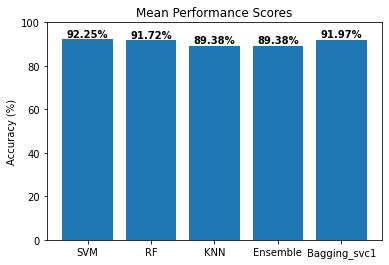

In [146]:
import matplotlib.pyplot as plt

# mean scores
acc_scores = [92.25, 91.72, 89.38, 89.38, 91.97]
prec_scores = [92.24, 91.82, 92.32, 89.64, 92.94]
rec_scores = [92.24, 92.25, 92.25, 89.39, 92.78]
f1_scores = [92.12, 91.71, 92.21, 89.28, 92.75]

# plot bar graph
fig, ax = plt.subplots()
ax.bar(['SVM', 'RF', 'KNN', 'Ensemble', 'Bagging_svc1'], acc_scores)
ax.set_ylim([0, 100])
ax.set_ylabel('Accuracy (%)')
ax.set_title('Mean Performance Scores')

# add text on top of each bar
for i, score in enumerate(acc_scores):
    ax.text(i, score+1, f'{score:.2f}%', ha='center', fontweight='bold')

plt.show()


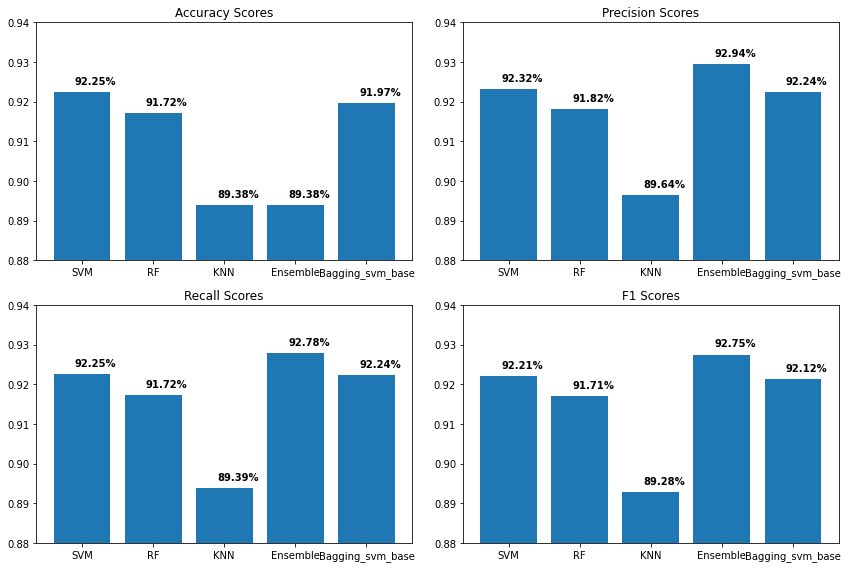

In [161]:
import matplotlib.pyplot as plt

# Mean scores for all models
svm_acc = 0.9224676514904392
rf_acc = 0.9171627030357632
knn_acc = 0.8938293179241035
ensemble_acc = 0.8938293179241035
bagging_svc1_acc = 0.9197337558444787

bagging_svc1_prec = 0.9224143431620275
bagging_svc1_recall = 0.9223658824993777
bagging_svc1_f1 = 0.9212181003564528

rf_prec = 0.9182129630417075
rf_recall = 0.9172221184963902
rf_f1 = 0.9170704270017718

svm_prec = 0.9231802198449686
svm_recall = 0.9225339183470253
svm_f1 = 0.922067468019834

knn_prec = 0.8964162990953245
knn_recall = 0.8938729151107794
knn_f1 = 0.8927679058848476

ensemble_prec = 0.9294194313805413
ensemble_recall = 0.9278286034353995
ensemble_f1 = 0.9274902817750336

# Create lists of mean scores and their corresponding labels
acc_scores = [svm_acc, rf_acc, knn_acc, ensemble_acc, bagging_svc1_acc]
prec_scores = [svm_prec, rf_prec, knn_prec, ensemble_prec, bagging_svc1_prec]
recall_scores = [svm_recall, rf_recall, knn_recall, ensemble_recall, bagging_svc1_recall]
f1_scores = [svm_f1, rf_f1, knn_f1, ensemble_f1, bagging_svc1_f1]
labels = ['SVM', 'RF', 'KNN', 'Ensemble', 'Bagging_svm_base']

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.bar(labels, acc_scores)
plt.ylim([0.88, 0.94])
plt.title("Accuracy Scores")
for i, v in enumerate(acc_scores):
    plt.text(i-0.1, v+0.002, str(round(v*100,2))+'%', fontweight='bold')

plt.subplot(2, 2, 2)
plt.bar(labels, prec_scores)
plt.ylim([0.88, 0.94])
plt.title("Precision Scores")
for i, v in enumerate(prec_scores):
    plt.text(i-0.1, v+0.002, str(round(v*100,2))+'%', fontweight='bold')

plt.subplot(2, 2, 3)
plt.bar(labels, recall_scores)
plt.ylim([0.88, 0.94])
plt.title("Recall Scores")
for i, v in enumerate(recall_scores):
    plt.text(i-0.1, v+0.002, str(round(v*100,2))+'%', fontweight='bold')
#plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 4)
plt.bar(labels, f1_scores)
plt.ylim([0.88, 0.94])
plt.title("F1 Scores")
for i, v in enumerate(f1_scores):
    plt.text(i-0.1, v+0.002, str(round(v*100,2))+'%', fontweight='bold')
#plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

In [284]:
from joblib import load

svm_model = load('svm_cv.pkl')
rf_model = load('rf_cv.pkl')
knn_model = load('knn_cv.pkl')
ensemble_model = load('ens_cv.pkl')
bagging_svc1_model = load('bagging_svc1_cv.pkl')


<function matplotlib.pyplot.show(close=None, block=None)>

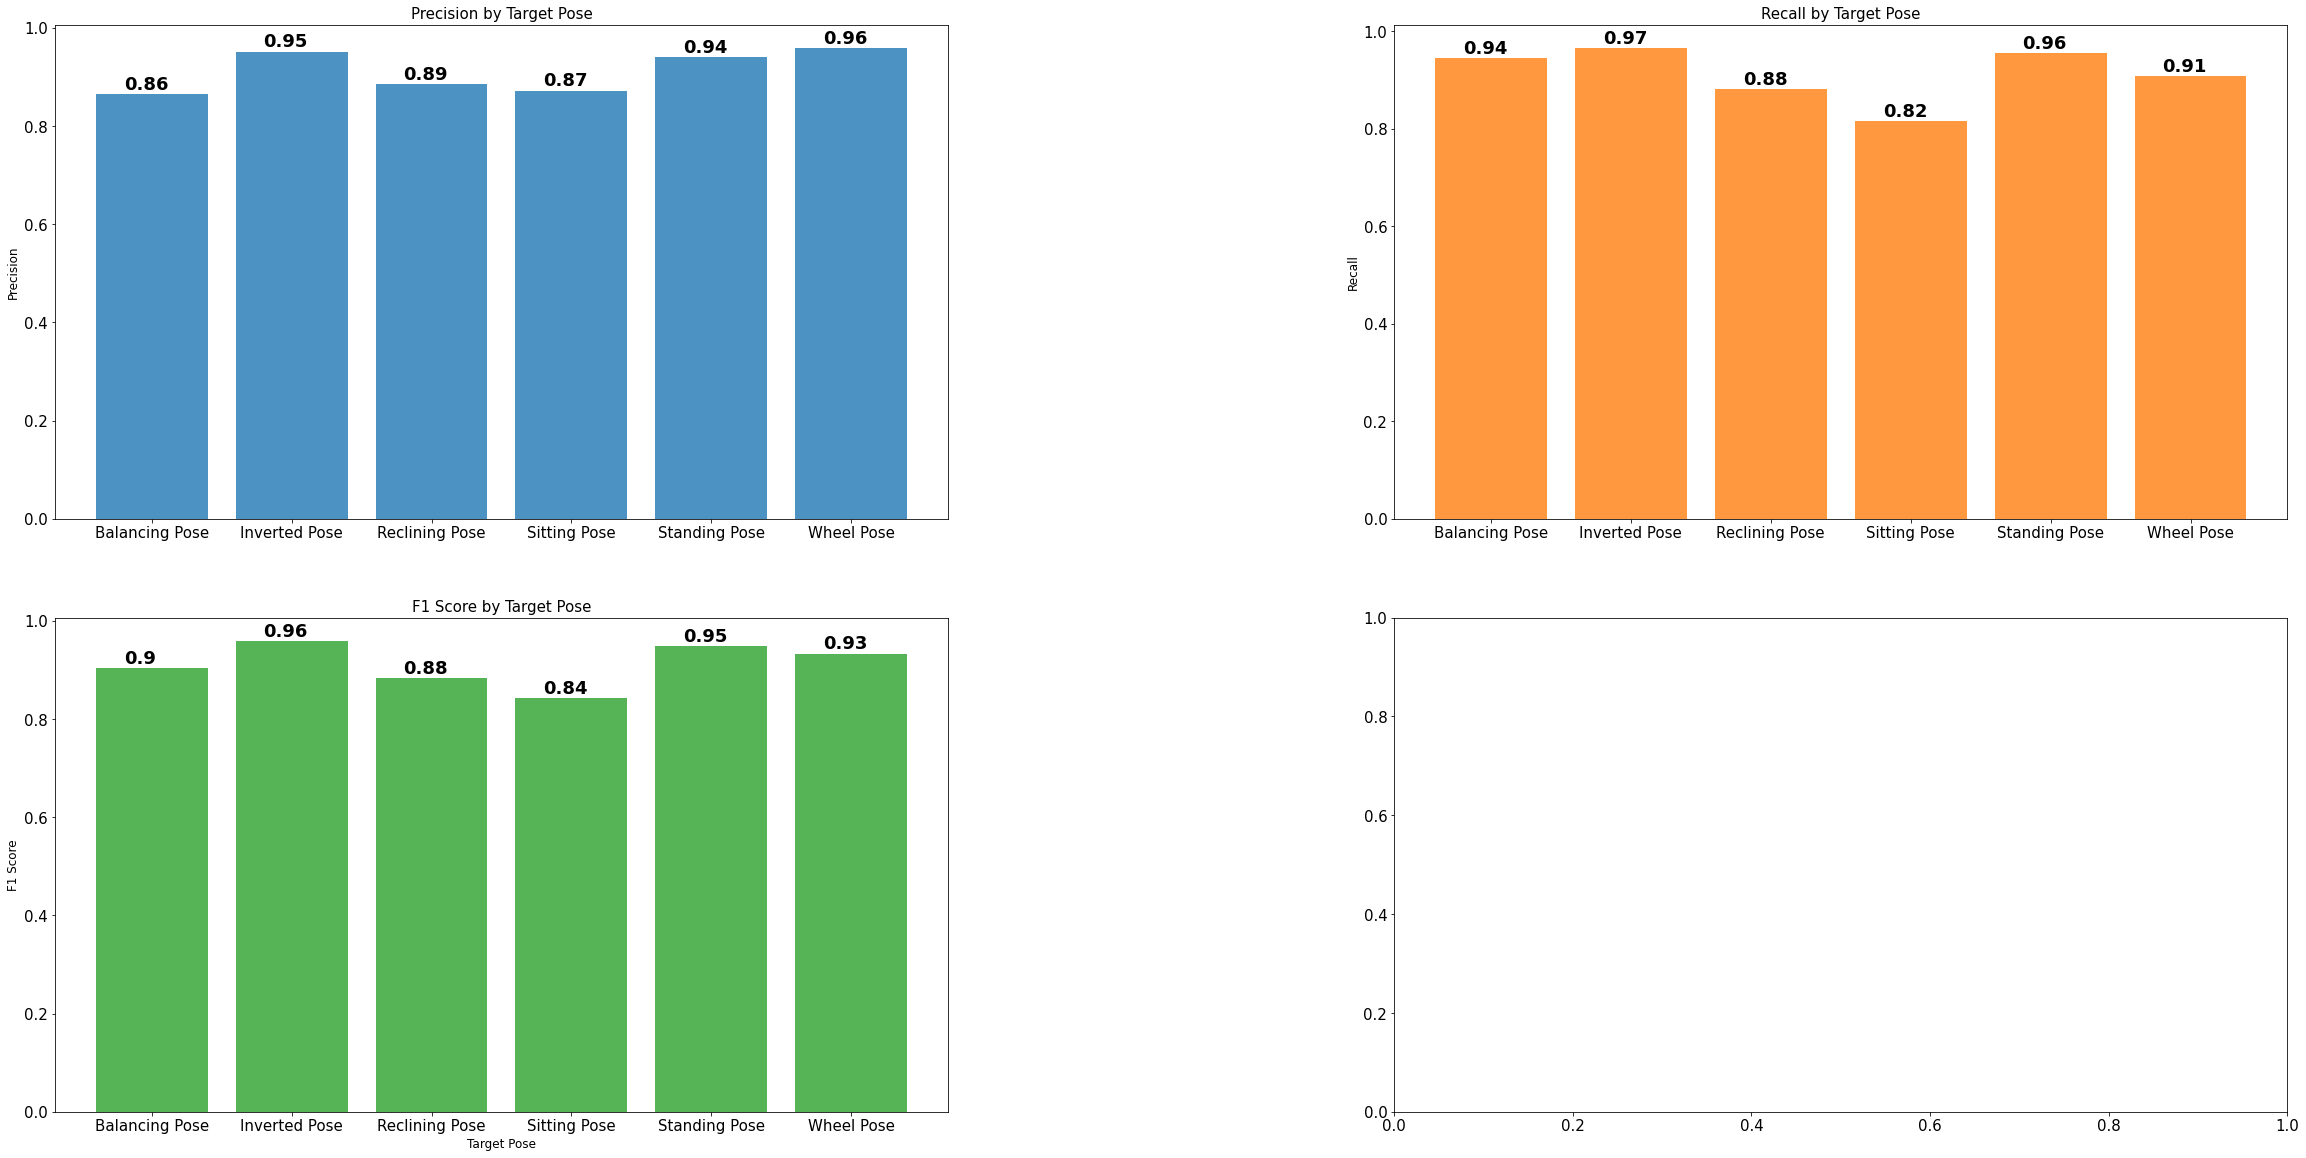

In [387]:
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

pose_names = {'balancing_pose': 'Balancing Pose', 'inverted_pose': 'Inverted Pose',
              'reclining_pose': 'Reclining Pose', 'sitting_pose': 'Sitting Pose',
              'standing_pose': 'Standing Pose', 'wheel_pose': 'Wheel Pose'}

# Get predictions for test data
svm_preds = clf9.predict(X_test)

# Generate classification report
class_report = classification_report(y_test, svm_preds, target_names=pose_names.values(), output_dict=True)

# Extract precision, recall, and F1 score for each pose
precision_scores = [class_report[pose_names[pose]]['precision'] for pose in pose_names.keys()]
recall_scores = [class_report[pose_names[pose]]['recall'] for pose in pose_names.keys()]
f1_scores = [class_report[pose_names[pose]]['f1-score'] for pose in pose_names.keys()]


# Set up the figure
plt.rcParams['font.size'] = 15
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(40,20))

# Plot the precision scores
ax[0, 0].bar(pose_names.values(), precision_scores, color='#1f77b4', alpha=0.8)
for i, v in enumerate(precision_scores):
    ax[0, 0].text(i-0.2, v+0.01, str(round(v,2)), color='black', fontweight='bold', fontsize=18)
ax[0, 0].set_ylabel('Precision', fontsize=12)
ax[0, 0].set_title('Precision by Target Pose', fontsize=15)

# Plot the recall scores
ax[0, 1].bar(pose_names.values(), recall_scores, color='#ff7f0e', alpha=0.8)
for i, v in enumerate(recall_scores):
    ax[0, 1].text(i-0.2, v+0.01, str(round(v,2)), color='black', fontweight='bold', fontsize=18)
ax[0, 1].set_ylabel('Recall', fontsize=12)
ax[0, 1].set_title('Recall by Target Pose', fontsize=15)

# Plot the F1 scores
ax[1, 0].bar(pose_names.values(), f1_scores, color='#2ca02c', alpha=0.8)
for i, v in enumerate(f1_scores):
    ax[1, 0].text(i-0.2, v+0.01, str(round(v,2)), color='black', fontweight='bold', fontsize=18)
ax[1, 0].set_xlabel('Target Pose', fontsize=12)
ax[1, 0].set_ylabel('F1 Score', fontsize=12)
ax[1, 0].set_title('F1 Score by Target Pose', fontsize=15)

plt.subplots_adjust(wspace=0.5)
plt.show


